<a href="https://colab.research.google.com/github/tanishajn12/NNDL-Labs/blob/main/yolov8_dropcap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [4]:
%cd

/root


In [5]:
%cd /content/

/content


In [6]:
import zipfile

zip_path = "/content/dropcap_yolov8.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

In [7]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')  # or yolov8s.pt, yolov8m.pt etc.

100%|██████████| 21.5M/21.5M [00:00<00:00, 185MB/s]


In [ ]:
model.train(
    data='/content/dropcap00/data.yaml',
    epochs=100,              # More epochs since data is small
    imgsz=640,
    batch=2,                 # Small batch to prevent overfitting and fit into memory
    name='dropcap-yolov8n',
    project='dropcap-runs',
    cache=True,
    augment=True,            # Enables built-in augmentations (mosaic, flip, HSV, scale)
    degrees=10,              # Random rotation
    flipud=0.5,              # Vertical flip
    fliplr=0.5,              # Horizontal flip
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    mosaic=1.0,
    mixup=0.2,
    patience=20              # Stop early if no improvement
)

In [8]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [9]:
model.train(
    data='/content/dropcap_yolov8/data.yaml',
    epochs=50,
    imgsz=640,
    batch=2,
    name='dropcap-yolov8n',
    project='dropcap-runs',
    augment=True,
    degrees=5,
    translate=0.1,
    scale=0.5,
    shear=2,
    perspective=0.0005,
    flipud=0.5,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.1,
    cache=True,
    patience=10,
    lr0=0.0005
)


Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dropcap_yolov8/data.yaml, degrees=5, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=dropcap-yolov8n, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0005, plots=True, pose=12

100%|██████████| 755k/755k [00:00<00:00, 153MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2116435  ultralytics.nn.modules.head.Detect           [1, [128, 256, 512]]          
Model summary: 129 layers, 11,135,987 parameters, 11,135,971 gradients, 28.6 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 291MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1916.7±935.8 MB/s, size: 190.5 KB)


train: Scanning /content/dropcap_yolov8/train/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 2279.16it/s]

train: New cache created: /content/dropcap_yolov8/train/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



train: Caching images (0.0GB RAM): 100%|██████████| 60/60 [00:00<00:00, 218.26it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1049.1±844.6 MB/s, size: 145.5 KB)


val: Scanning /content/dropcap_yolov8/valid/labels... 9 images, 1 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<00:00, 3194.44it/s]

val: New cache created: /content/dropcap_yolov8/valid/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.0GB RAM): 100%|██████████| 9/9 [00:00<00:00, 84.45it/s]


Plotting labels to dropcap-runs/dropcap-yolov8n/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to dropcap-runs/dropcap-yolov8n
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50     0.598G      2.424      7.685      1.593          4        640: 100%|██████████| 30/30 [00:04<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all          9         10      0.196        0.1      0.105     0.0415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.734G       2.46      11.11      1.589         11        640: 100%|██████████| 30/30 [00:03<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 17.88it/s]

                   all          9         10   0.000741        0.2   0.000466    8.8e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.812G      1.961      14.41      1.469          4        640: 100%|██████████| 30/30 [00:02<00:00, 11.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.58it/s]

                   all          9         10    0.00037        0.1   0.000213   0.000106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.848G      2.049      19.11      1.488          6        640: 100%|██████████| 30/30 [00:03<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.00it/s]

                   all          9         10    0.00272        0.5    0.00249   0.000997



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.912G      2.129      24.55      1.671          9        640: 100%|██████████| 30/30 [00:02<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 23.03it/s]

                   all          9         10    0.00905        0.2    0.00733    0.00316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.977G      2.467      31.11       1.66          7        640: 100%|██████████| 30/30 [00:02<00:00, 11.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 24.48it/s]

                   all          9         10          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.05G       2.85      6.563      1.898          4        640: 100%|██████████| 30/30 [00:02<00:00, 12.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 23.99it/s]

                   all          9         10    0.00284        0.1    0.00356    0.00111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.13G      2.608      4.739      1.861          6        640: 100%|██████████| 30/30 [00:03<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.59it/s]


                   all          9         10       0.21        0.3      0.104     0.0542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.19G      2.155      3.844      1.742          7        640: 100%|██████████| 30/30 [00:02<00:00, 11.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 24.22it/s]

                   all          9         10       0.21        0.3      0.104     0.0542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.24G      1.885      3.699      1.561          7        640: 100%|██████████| 30/30 [00:02<00:00, 11.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.98it/s]

                   all          9         10    0.00773        0.4    0.00667    0.00349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.32G      2.018      3.272      1.697         10        640: 100%|██████████| 30/30 [00:02<00:00, 11.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.60it/s]

                   all          9         10      0.657        0.6       0.54      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.38G      2.027      3.075      1.728          7        640: 100%|██████████| 30/30 [00:03<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 24.21it/s]

                   all          9         10      0.161        0.3        0.2     0.0904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.45G       1.82      2.601      1.469          3        640: 100%|██████████| 30/30 [00:02<00:00, 12.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 24.45it/s]

                   all          9         10       0.89        0.2      0.321       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.53G       1.86       2.85      1.489          9        640: 100%|██████████| 30/30 [00:02<00:00, 11.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 24.48it/s]

                   all          9         10      0.966        0.5      0.694      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.61G      1.696      2.576      1.394          4        640: 100%|██████████| 30/30 [00:02<00:00, 11.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 23.84it/s]

                   all          9         10      0.832      0.496      0.661      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.69G        1.7       2.18      1.419         12        640: 100%|██████████| 30/30 [00:03<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.08it/s]

                   all          9         10      0.742      0.577      0.669      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.72G      1.716      2.224      1.443          8        640: 100%|██████████| 30/30 [00:02<00:00, 11.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.73it/s]

                   all          9         10      0.937        0.5      0.645      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.78G       1.81       2.43       1.52          1        640: 100%|██████████| 30/30 [00:02<00:00, 12.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 24.34it/s]

                   all          9         10          1       0.69      0.756      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.85G       1.64      2.038      1.452          6        640: 100%|██████████| 30/30 [00:02<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.26it/s]

                   all          9         10      0.976        0.7       0.76       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.93G      1.686      2.022      1.407          7        640: 100%|██████████| 30/30 [00:02<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 23.38it/s]

                   all          9         10       0.82        0.7      0.809      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.97G      1.545      1.814      1.321          2        640: 100%|██████████| 30/30 [00:02<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 24.53it/s]

                   all          9         10       0.78      0.709      0.858      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.03G      1.627      1.844      1.419          3        640: 100%|██████████| 30/30 [00:02<00:00, 12.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.71it/s]

                   all          9         10      0.861        0.7      0.846      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.11G      1.613      1.795      1.385          4        640: 100%|██████████| 30/30 [00:02<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 18.72it/s]

                   all          9         10      0.858        0.7      0.797       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.16G      1.521      1.789      1.417         10        640: 100%|██████████| 30/30 [00:02<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 23.97it/s]

                   all          9         10       0.86        0.7      0.813      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.23G      1.552      1.624      1.444          6        640: 100%|██████████| 30/30 [00:02<00:00, 11.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 24.23it/s]

                   all          9         10       0.86        0.7      0.813      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       2.3G      1.506      1.606      1.341          2        640: 100%|██████████| 30/30 [00:02<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 25.08it/s]

                   all          9         10      0.879        0.8      0.847      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.38G      1.485      1.736      1.359         11        640: 100%|██████████| 30/30 [00:03<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 24.65it/s]

                   all          9         10      0.797        0.8      0.853       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.46G      1.447      1.441      1.299          6        640: 100%|██████████| 30/30 [00:02<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 24.20it/s]

                   all          9         10       0.21        0.6      0.292      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       2.5G      1.477      1.696      1.343          8        640: 100%|██████████| 30/30 [00:02<00:00, 11.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.75it/s]

                   all          9         10      0.593        0.6      0.557      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.56G      1.481      1.589      1.331         11        640: 100%|██████████| 30/30 [00:02<00:00, 11.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 25.12it/s]

                   all          9         10      0.939        0.7      0.799      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.62G      1.468      1.594      1.317          4        640: 100%|██████████| 30/30 [00:03<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 25.09it/s]

                   all          9         10      0.698        0.8      0.793      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.69G      1.448      1.468      1.326          3        640: 100%|██████████| 30/30 [00:02<00:00, 11.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 24.47it/s]

                   all          9         10      0.885      0.773      0.884      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.77G      1.392      1.805      1.264          5        640: 100%|██████████| 30/30 [00:02<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 24.70it/s]

                   all          9         10        0.9        0.9      0.904      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.83G      1.472      1.623      1.247          6        640: 100%|██████████| 30/30 [00:02<00:00, 11.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 15.68it/s]

                   all          9         10      0.885        0.9      0.897      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.91G      1.397      1.401      1.265          4        640: 100%|██████████| 30/30 [00:03<00:00,  9.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 24.65it/s]

                   all          9         10          1      0.892      0.904      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.98G       1.45       1.44      1.321          9        640: 100%|██████████| 30/30 [00:02<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 24.45it/s]

                   all          9         10       0.89        0.9      0.903      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.05G      1.455      1.334      1.327         15        640: 100%|██████████| 30/30 [00:02<00:00, 11.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 22.81it/s]

                   all          9         10      0.895        0.9      0.902      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.11G      1.401      1.362      1.252          4        640: 100%|██████████| 30/30 [00:02<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 19.08it/s]

                   all          9         10      0.897      0.877      0.907       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.15G      1.537      1.514      1.315          2        640: 100%|██████████| 30/30 [00:02<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 21.38it/s]

                   all          9         10      0.899      0.895      0.899      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.21G      1.304      1.171      1.216          4        640: 100%|██████████| 30/30 [00:02<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 23.35it/s]

                   all          9         10      0.898      0.886      0.898      0.632


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.29G      1.357      1.228      1.296          2        640: 100%|██████████| 30/30 [00:02<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 20.30it/s]

                   all          9         10      0.898      0.886      0.898      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.37G      1.317      1.286      1.294          2        640: 100%|██████████| 30/30 [00:03<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 23.27it/s]

                   all          9         10      0.986        0.8      0.896      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.43G      1.287      1.204      1.196          2        640: 100%|██████████| 30/30 [00:02<00:00, 12.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 23.05it/s]

                   all          9         10          1      0.875      0.909      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       3.5G      1.226      1.163      1.212          3        640: 100%|██████████| 30/30 [00:02<00:00, 11.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 24.05it/s]

                   all          9         10          1      0.885      0.925      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.56G      1.334      1.087       1.25          3        640: 100%|██████████| 30/30 [00:02<00:00, 12.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 24.43it/s]

                   all          9         10      0.889        0.9      0.928       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.62G      1.477      1.279      1.358          2        640: 100%|██████████| 30/30 [00:03<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 24.51it/s]

                   all          9         10      0.898        0.9      0.937      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.69G      1.317      1.088      1.277          7        640: 100%|██████████| 30/30 [00:02<00:00, 12.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 23.43it/s]

                   all          9         10      0.899      0.893      0.942      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.75G       1.34      1.078      1.291          2        640: 100%|██████████| 30/30 [00:02<00:00, 12.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 24.54it/s]

                   all          9         10      0.899      0.891      0.927      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.82G      1.291      1.021      1.217          2        640: 100%|██████████| 30/30 [00:02<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 24.35it/s]

                   all          9         10      0.899      0.893      0.927      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.88G       1.28     0.9981      1.212          4        640: 100%|██████████| 30/30 [00:03<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 24.47it/s]

                   all          9         10      0.899      0.894      0.942      0.639



50 epochs completed in 0.047 hours.
Optimizer stripped from dropcap-runs/dropcap-yolov8n/weights/last.pt, 22.5MB
Optimizer stripped from dropcap-runs/dropcap-yolov8n/weights/best.pt, 22.5MB

Validating dropcap-runs/dropcap-yolov8n/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]


                   all          9         10          1      0.876      0.948      0.653
Speed: 0.4ms preprocess, 73.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to dropcap-runs/dropcap-yolov8n


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e3eaa50b490>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [10]:
model = YOLO('dropcap-runs/dropcap-yolov8n/weights/best.pt')

In [11]:
metrics = model.val()

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1340.4±411.2 MB/s, size: 139.4 KB)


val: Scanning /content/dropcap_yolov8/valid/labels.cache... 9 images, 1 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]


                   all          9         10      0.889        0.9      0.925       0.67
Speed: 0.2ms preprocess, 26.7ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val


In [12]:
print(metrics)

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e3e836dca10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

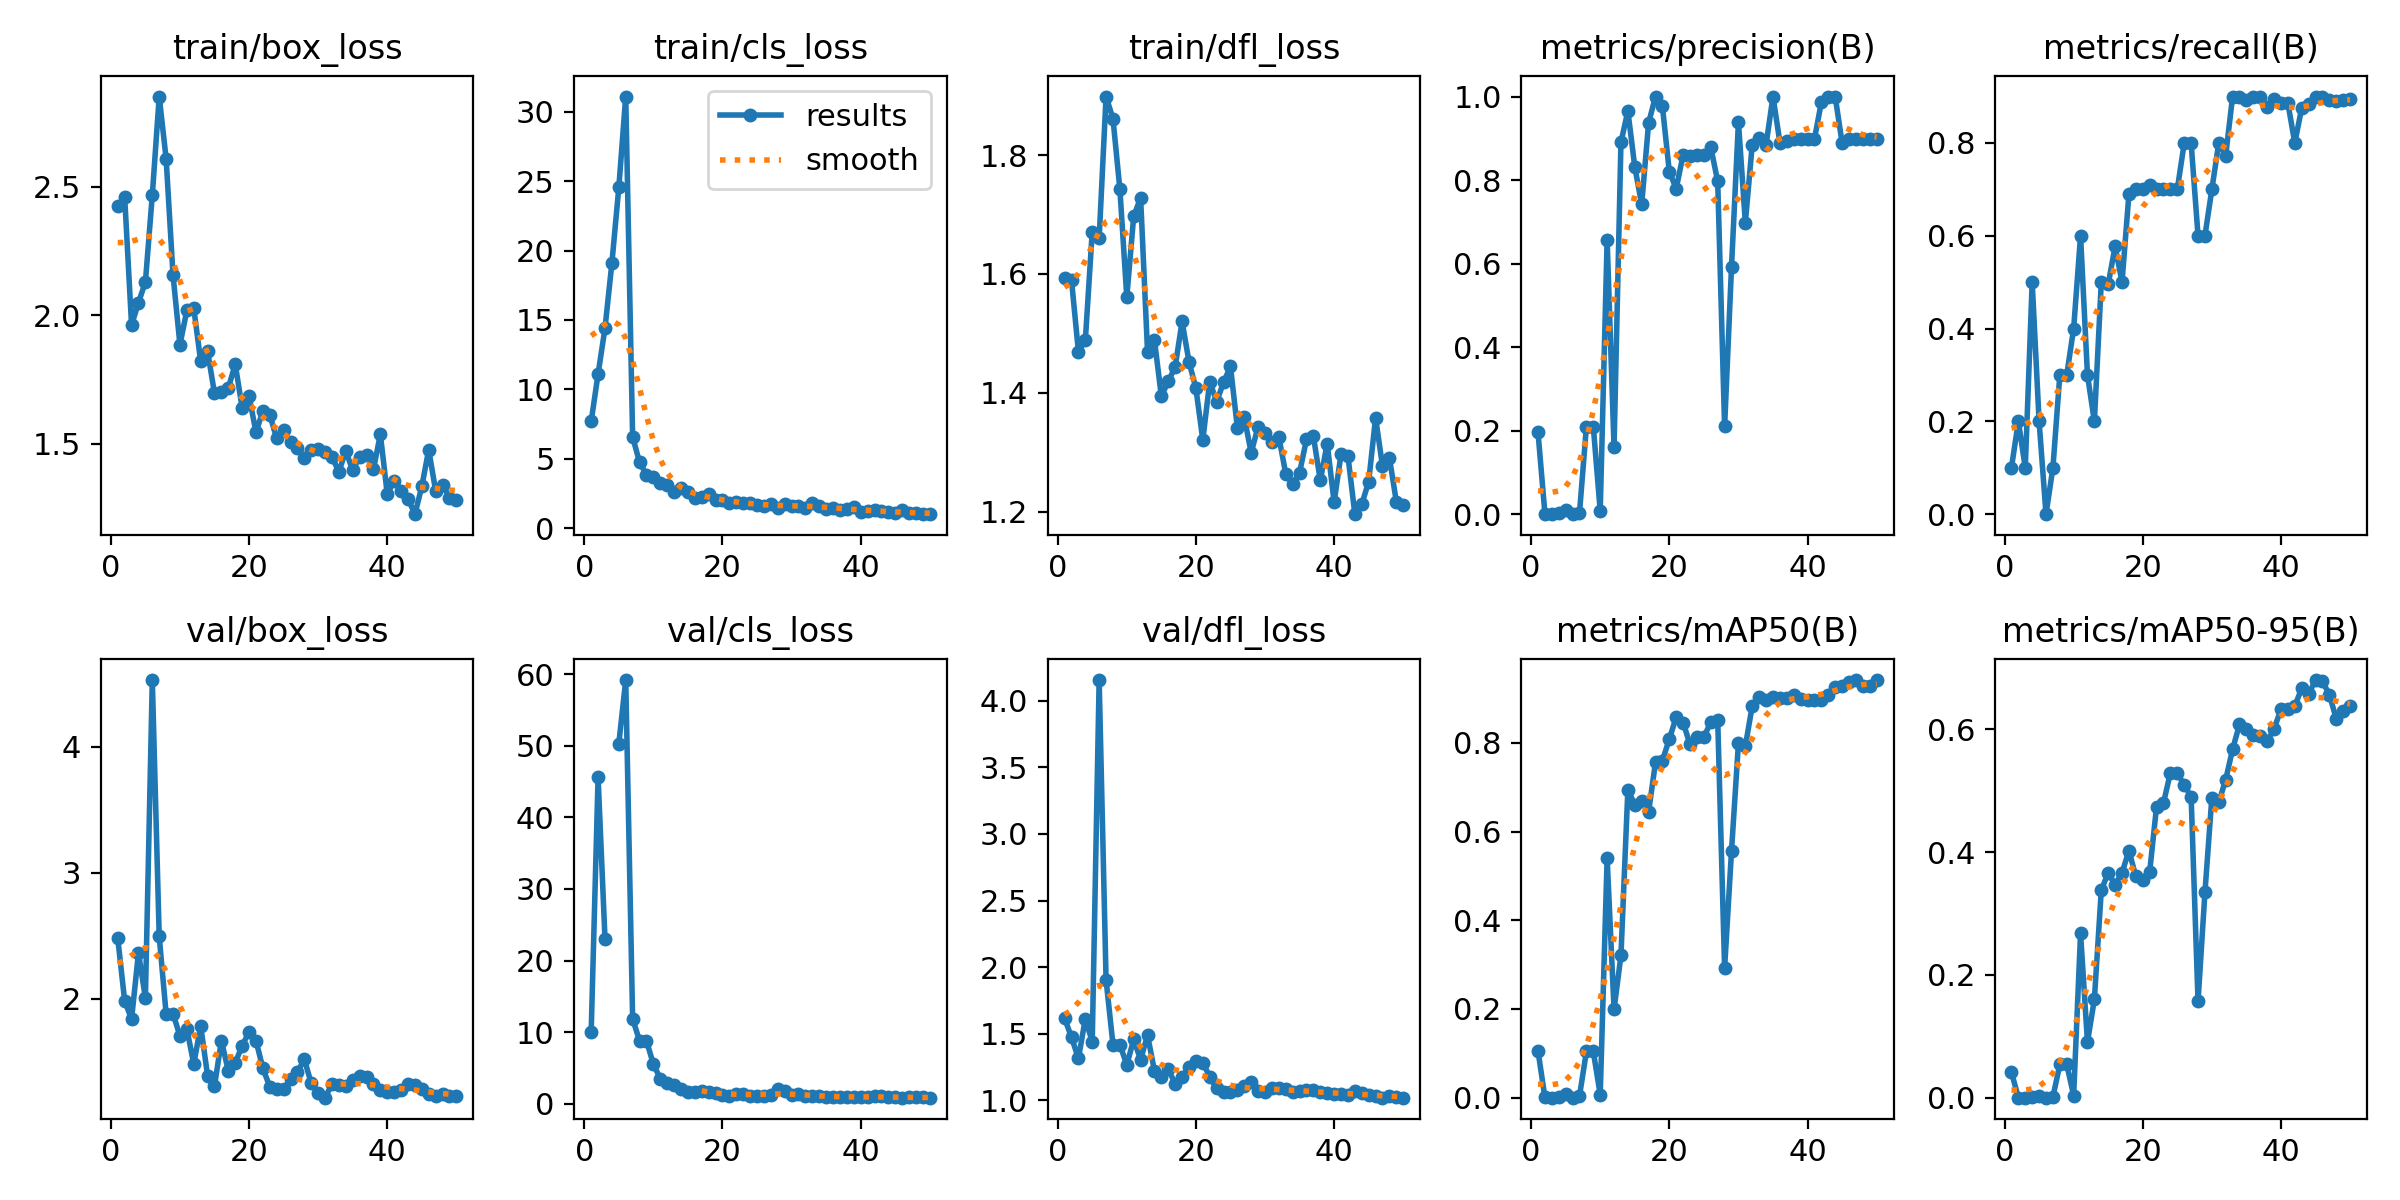

In [13]:
from IPython.display import Image

Image('dropcap-runs/dropcap-yolov8n/results.png')


image 1/1 /content/dropcap_yolov8/test/images/c08a3effca4eaec29a21b00bed869b2e_jpg.rf.f359aaf0337571a880ca3fbd3f12a0fb.jpg: 640x448 1 drop_cap, 44.3ms
Speed: 3.3ms preprocess, 44.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 448)


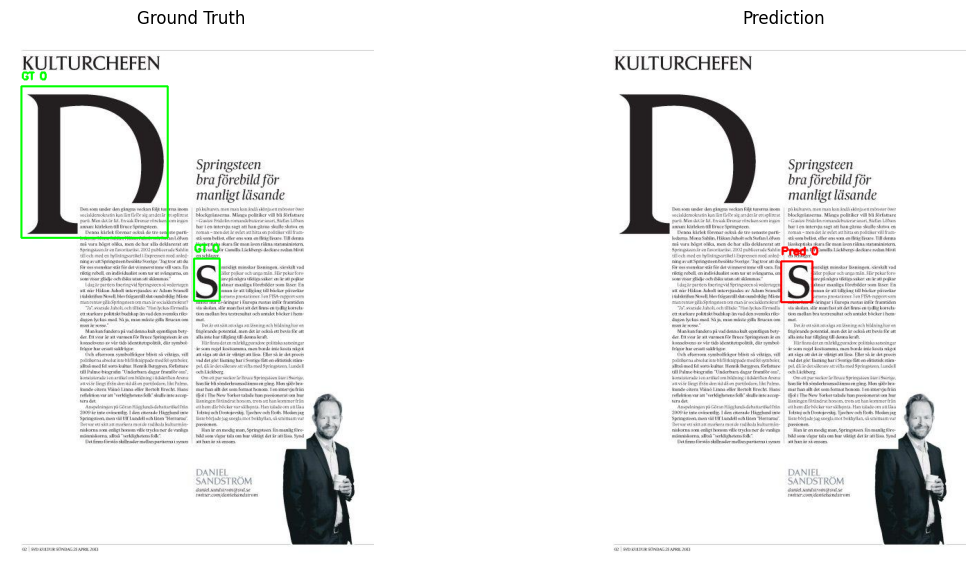

In [14]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os

model = YOLO('dropcap-runs/dropcap-yolov8n/weights/best.pt')

def load_labels(label_path):
    """Load YOLO labels from txt file."""
    boxes = []
    with open(label_path, 'r') as f:
        for line in f.readlines():
            cls, x_c, y_c, w, h = map(float, line.strip().split())
            boxes.append((int(cls), x_c, y_c, w, h))
    return boxes

def draw_boxes(image, boxes, color=(0,255,0), label_prefix='GT'):

    h, w = image.shape[:2]
    for (cls, x_c, y_c, bw, bh) in boxes:
        # Convert normalized coordinates to pixels
        x1 = int((x_c - bw/2) * w)
        y1 = int((y_c - bh/2) * h)
        x2 = int((x_c + bw/2) * w)
        y2 = int((y_c + bh/2) * h)
        cv2.rectangle(image, (x1,y1), (x2,y2), color, 2)
        cv2.putText(image, f"{label_prefix} {cls}", (x1, y1-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return image


img_path = '/content/dropcap_yolov8/test/images/c08a3effca4eaec29a21b00bed869b2e_jpg.rf.f359aaf0337571a880ca3fbd3f12a0fb.jpg'
label_path = '/content/dropcap_yolov8/test/labels/c08a3effca4eaec29a21b00bed869b2e_jpg.rf.f359aaf0337571a880ca3fbd3f12a0fb.txt'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

#ground truth
gt_boxes = load_labels(label_path)
img_gt = img.copy()
img_gt = draw_boxes(img_gt, gt_boxes, color=(0,255,0), label_prefix='GT')


results = model(img_path)
pred_boxes = []
for box in results[0].boxes.data.tolist():
    # box format: [x1, y1, x2, y2, score, class]
    x1, y1, x2, y2, conf, cls = box
    w = x2 - x1
    h = y2 - y1
    x_c = (x1 + x2)/2
    y_c = (y1 + y2)/2
    img_w, img_h = img.shape[1], img.shape[0]
    pred_boxes.append((
        int(cls),
        x_c/img_w,
        y_c/img_h,
        w/img_w,
        h/img_h
    ))


img_pred = img.copy()
img_pred = draw_boxes(img_pred, pred_boxes, color=(255,0,0), label_prefix='Pred')

# Plot GT and Predicted
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title('Ground Truth')
plt.imshow(img_gt)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Prediction')
plt.imshow(img_pred)
plt.axis('off')

plt.show()



image 1/1 /content/3875d32aca96feaaa01c9f4401827fcf.jpg: 640x512 3 drop_caps, 46.3ms
Speed: 5.4ms preprocess, 46.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


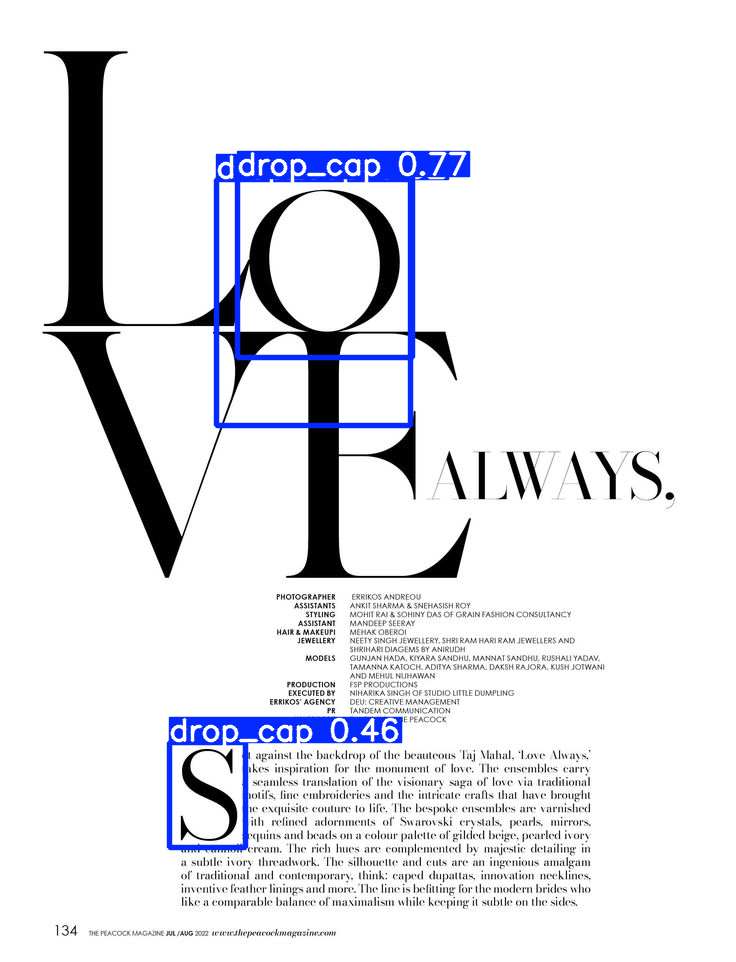

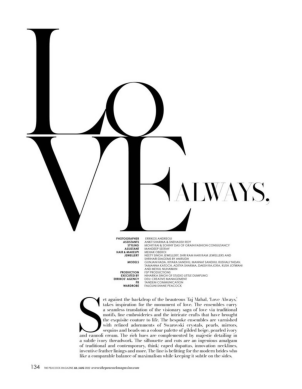

In [15]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2


model = YOLO('dropcap-runs/dropcap-yolov8n/weights/best.pt')

path = '/content/3875d32aca96feaaa01c9f4401827fcf.jpg'


results = model(path)
results[0].show()

img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()


image 1/1 /content/368bc64e3ac161cffefad1f4b8f34560.jpg: 640x480 7 drop_caps, 44.5ms
Speed: 4.1ms preprocess, 44.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


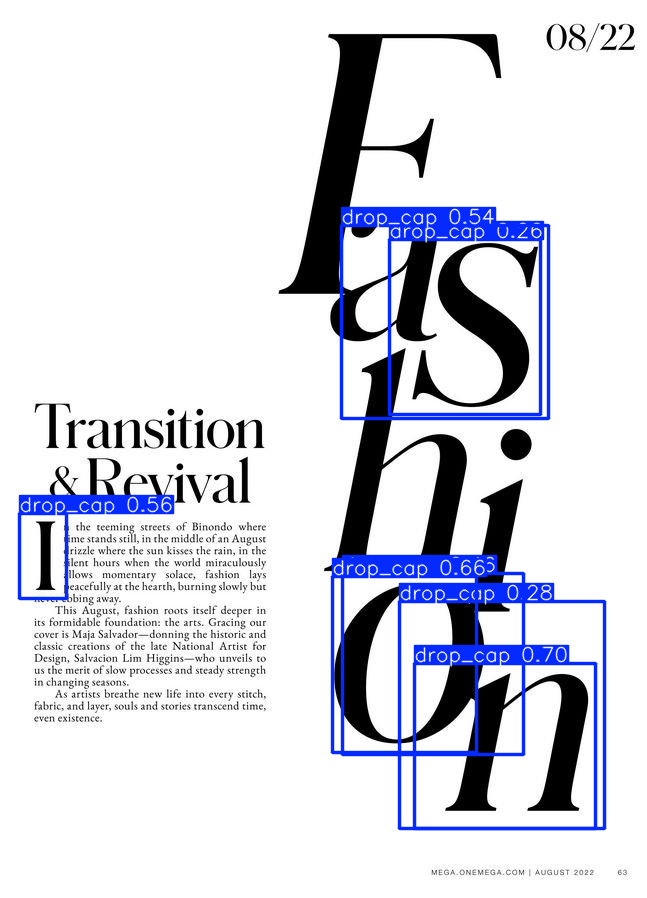

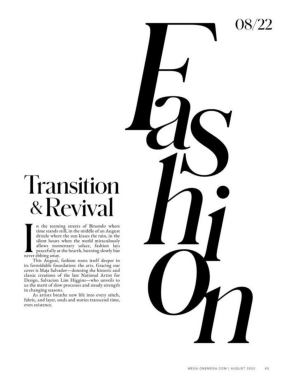

In [16]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2


model = YOLO('/content/dropcap-runs/dropcap-yolov8n/weights/best.pt')

path = '/content/368bc64e3ac161cffefad1f4b8f34560.jpg'


results = model(path)
results[0].show()

img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

In [17]:
model.val(data='/content/dropcap_yolov8/data.yaml', device=0)

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1874.8±575.0 MB/s, size: 122.5 KB)


val: Scanning /content/dropcap_yolov8/valid/labels.cache... 9 images, 1 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]


                   all          9         10      0.889        0.9      0.925       0.67
Speed: 0.3ms preprocess, 15.8ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e3e8392f2d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

| Metric                 | Value                | Meaning                                                      |
| ---------------------- | -------------------- | ------------------------------------------------------------ |
| `metrics/precision(B)` | **0.888**            | Of all predicted drop caps, \~88.8% were correct. Very good. |
| `metrics/recall(B)`    | **0.9**              | The model found 90% of actual drop caps. Excellent recall.   |
| `metrics/mAP50(B)`     | **0.925**            | Mean Average Precision at IoU=0.5. Strong performance.       |
| `metrics/mAP50-95(B)`  | **0.669**            | mAP at IoU from 0.5 to 0.95. More strict, still solid.       |



image 1/1 /content/dropcap_yolov8/test/images/091959459f8e0e16ff1bece7dabd32e3_jpg.rf.f3d8802a84cfeec6d51a9f0ae6140d02.jpg: 640x544 (no detections), 43.0ms
Speed: 3.6ms preprocess, 43.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 544)


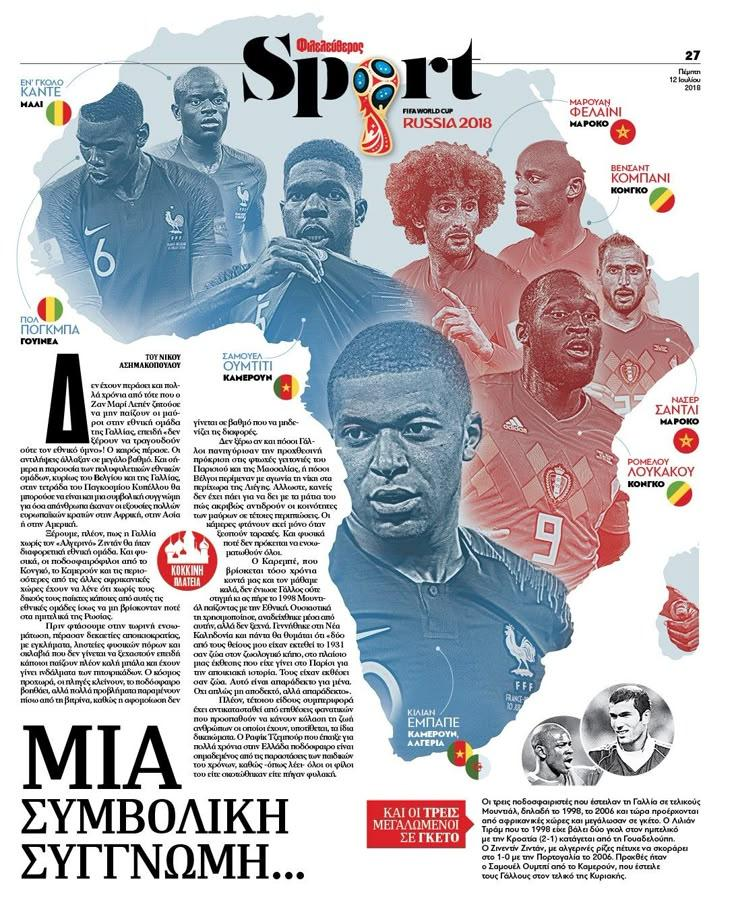

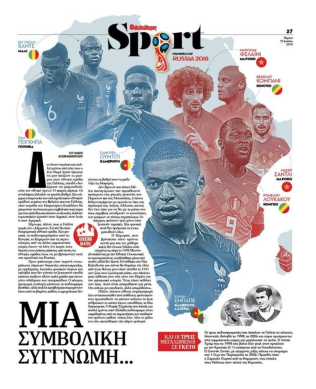

In [18]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2


model = YOLO('/content/dropcap-runs/dropcap-yolov8n/weights/best.pt')

path = '/content/dropcap_yolov8/test/images/091959459f8e0e16ff1bece7dabd32e3_jpg.rf.f3d8802a84cfeec6d51a9f0ae6140d02.jpg'


results = model(path)
results[0].show()

img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()


image 1/1 /content/dropcap_yolov8/test/images/dropcap18_jpeg.rf.e9532c6ac66b634b2335314f47ab84ed.jpg: 448x640 1 drop_cap, 44.3ms
Speed: 2.5ms preprocess, 44.3ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


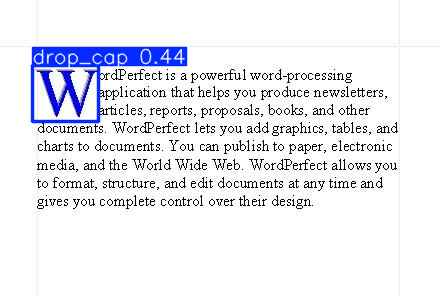

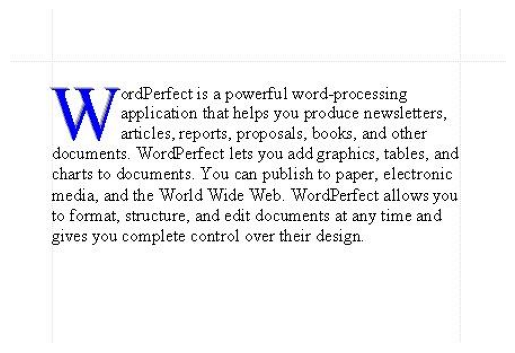

In [19]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2


model = YOLO('/content/dropcap-runs/dropcap-yolov8n/weights/best.pt')

path = '/content/dropcap_yolov8/test/images/dropcap18_jpeg.rf.e9532c6ac66b634b2335314f47ab84ed.jpg'


results = model(path)
results[0].show()

img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

In [20]:
model.train(
    data='/content/dropcap_yolov8/data.yaml',
    epochs=100,
    imgsz=896,
    batch=4,
    name='dropcap-v2',
    project='dropcap-runs',
    degrees=10,  # minor rotation
    scale=0.2,
    translate=0.1,
    shear=2.0,
    perspective=0.0005
)


Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dropcap_yolov8/data.yaml, degrees=10, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=896, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/dropcap-runs/dropcap-yolov8n/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=dropcap-v2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, p

train: Scanning /content/dropcap_yolov8/train/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 504.0±127.4 MB/s, size: 156.0 KB)


val: Scanning /content/dropcap_yolov8/valid/labels.cache... 9 images, 1 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<?, ?it/s]


Plotting labels to dropcap-runs/dropcap-v2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 896 train, 896 val
Using 2 dataloader workers
Logging results to dropcap-runs/dropcap-v2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.25G      1.694      3.512       1.77          9        896: 100%|██████████| 15/15 [00:03<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all          9         10    0.00148        0.4    0.00106   0.000438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.51G      1.674      3.081      1.648          8        896: 100%|██████████| 15/15 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.52it/s]

                   all          9         10       0.19        0.2      0.208      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.51G      1.725      2.758      1.592         11        896: 100%|██████████| 15/15 [00:02<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.99it/s]

                   all          9         10          1      0.466      0.697      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.67G      1.579      2.314      1.538          9        896: 100%|██████████| 15/15 [00:02<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.90it/s]

                   all          9         10          1      0.576       0.71      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.67G      1.606      2.493      1.506         16        896: 100%|██████████| 15/15 [00:02<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.91it/s]

                   all          9         10      0.884      0.768      0.848      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.67G      1.684       2.29      1.602         11        896: 100%|██████████| 15/15 [00:02<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.08it/s]


                   all          9         10      0.877        0.9      0.883      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.67G      1.465      2.227      1.418          9        896: 100%|██████████| 15/15 [00:02<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.83it/s]

                   all          9         10      0.806        0.9      0.946      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.67G       1.71      2.219      1.685          5        896: 100%|██████████| 15/15 [00:02<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.12it/s]

                   all          9         10       0.81          1      0.951      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.67G       1.68      2.298      1.633          8        896: 100%|██████████| 15/15 [00:02<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]

                   all          9         10      0.785          1      0.917      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.67G      1.641      2.111      1.606          7        896: 100%|██████████| 15/15 [00:03<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.69it/s]

                   all          9         10      0.895          1       0.95      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.67G      1.698      2.097      1.622          6        896: 100%|██████████| 15/15 [00:02<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.67it/s]


                   all          9         10      0.895          1       0.95      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.67G      1.631      1.994      1.654         12        896: 100%|██████████| 15/15 [00:02<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.64it/s]

                   all          9         10      0.909      0.996      0.977       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.67G      1.658      2.038      1.581          7        896: 100%|██████████| 15/15 [00:02<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]

                   all          9         10      0.831      0.987      0.968      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.67G      1.612      1.887      1.482         11        896: 100%|██████████| 15/15 [00:02<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.88it/s]

                   all          9         10      0.881        0.9      0.936      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.67G      1.629       1.92      1.642          8        896: 100%|██████████| 15/15 [00:02<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.08it/s]


                   all          9         10      0.887      0.789      0.914      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.67G      1.474      1.822      1.508          5        896: 100%|██████████| 15/15 [00:02<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.61it/s]

                   all          9         10      0.888      0.794      0.909      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.67G      1.445      1.746      1.456          6        896: 100%|██████████| 15/15 [00:02<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.24it/s]

                   all          9         10      0.994        0.8      0.954      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.67G      1.584      1.867      1.542         11        896: 100%|██████████| 15/15 [00:02<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.24it/s]


                   all          9         10      0.889        0.9      0.962      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.67G      1.452      1.754      1.498         17        896: 100%|██████████| 15/15 [00:02<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.42it/s]


                   all          9         10          1      0.883      0.986      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.67G      1.402      1.733      1.415          6        896: 100%|██████████| 15/15 [00:02<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.43it/s]

                   all          9         10      0.769      0.998      0.926      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.67G      1.509      1.756      1.471         10        896: 100%|██████████| 15/15 [00:02<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all          9         10      0.708          1      0.904      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.67G      1.379      1.511        1.4          6        896: 100%|██████████| 15/15 [00:02<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.90it/s]

                   all          9         10      0.697          1      0.911      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.67G      1.393      1.501      1.386          9        896: 100%|██████████| 15/15 [00:02<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.85it/s]

                   all          9         10      0.897      0.877      0.927      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.67G      1.378       1.42      1.285         12        896: 100%|██████████| 15/15 [00:02<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.96it/s]

                   all          9         10      0.806        0.9      0.859      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.67G      1.475      1.509      1.376          7        896: 100%|██████████| 15/15 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all          9         10      0.883      0.759       0.84      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.67G      1.354      1.488      1.392         10        896: 100%|██████████| 15/15 [00:02<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.56it/s]


                   all          9         10      0.899      0.889      0.866      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.67G      1.392      1.352      1.347          8        896: 100%|██████████| 15/15 [00:02<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.02it/s]


                   all          9         10      0.899      0.889      0.866      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.67G      1.409      1.298      1.286         10        896: 100%|██████████| 15/15 [00:02<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.00it/s]

                   all          9         10      0.889        0.8      0.904      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.67G       1.45      1.408      1.398          6        896: 100%|██████████| 15/15 [00:03<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]

                   all          9         10      0.933        0.7        0.9      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.67G      1.347      1.356      1.325         10        896: 100%|██████████| 15/15 [00:02<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.68it/s]


                   all          9         10      0.887      0.786      0.921      0.592

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.67G      1.341      1.339      1.325          8        896: 100%|██████████| 15/15 [00:02<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.41it/s]


                   all          9         10      0.893        0.9      0.956      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.67G      1.382      1.387      1.415         11        896: 100%|██████████| 15/15 [00:02<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.15it/s]


                   all          9         10      0.894        0.9      0.942      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.67G      1.387      1.354      1.459         13        896: 100%|██████████| 15/15 [00:03<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]

                   all          9         10       0.88        0.8      0.907      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.67G      1.253      1.271      1.317          8        896: 100%|██████████| 15/15 [00:02<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.82it/s]

                   all          9         10      0.879        0.8      0.916      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.67G       1.36      1.242      1.359          9        896: 100%|██████████| 15/15 [00:02<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.53it/s]

                   all          9         10      0.899      0.895      0.942      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.67G      1.327       1.22      1.353          7        896: 100%|██████████| 15/15 [00:02<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.36it/s]


                   all          9         10      0.907      0.974      0.959      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.67G      1.294      1.176      1.282          8        896: 100%|██████████| 15/15 [00:03<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all          9         10      0.897          1       0.95      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.67G       1.37      1.299      1.363          7        896: 100%|██████████| 15/15 [00:02<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.15it/s]

                   all          9         10      0.909      0.999       0.95      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.67G      1.276      1.265      1.362         10        896: 100%|██████████| 15/15 [00:02<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.42it/s]

                   all          9         10      0.824          1      0.928      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.67G      1.263      1.167      1.329          5        896: 100%|██████████| 15/15 [00:02<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.43it/s]

                   all          9         10      0.831          1      0.917      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.67G       1.31       1.18      1.367         10        896: 100%|██████████| 15/15 [00:03<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all          9         10      0.815          1      0.906      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.67G      1.254      1.184      1.265         10        896: 100%|██████████| 15/15 [00:02<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.79it/s]


                   all          9         10      0.831      0.984      0.917      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.67G      1.259      1.234      1.351         11        896: 100%|██████████| 15/15 [00:02<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.12it/s]


                   all          9         10      0.831      0.984      0.917      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.67G      1.276      1.112      1.292         16        896: 100%|██████████| 15/15 [00:02<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.21it/s]


                   all          9         10      0.812        0.9      0.888      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.67G      1.259      1.153      1.361          7        896: 100%|██████████| 15/15 [00:03<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.51it/s]

                   all          9         10      0.831      0.986      0.908      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.67G      1.319      1.165      1.413         10        896: 100%|██████████| 15/15 [00:02<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.58it/s]

                   all          9         10      0.831          1      0.908      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.67G      1.354      1.155      1.396         11        896: 100%|██████████| 15/15 [00:02<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.15it/s]

                   all          9         10      0.907      0.978      0.922      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.67G      1.207      1.028      1.211         13        896: 100%|██████████| 15/15 [00:02<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.60it/s]

                   all          9         10      0.899          1      0.922      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.67G      1.314      1.226      1.327         11        896: 100%|██████████| 15/15 [00:03<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.86it/s]

                   all          9         10      0.898          1      0.922      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.67G      1.086      1.016      1.236          9        896: 100%|██████████| 15/15 [00:02<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.55it/s]

                   all          9         10      0.905          1      0.931      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.67G      1.152      1.076       1.22          9        896: 100%|██████████| 15/15 [00:02<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.06it/s]


                   all          9         10      0.894        0.9      0.928      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.67G       1.32      1.129      1.321          7        896: 100%|██████████| 15/15 [00:02<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.74it/s]

                   all          9         10      0.886        0.9      0.926      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.67G      1.327      1.125      1.368          8        896: 100%|██████████| 15/15 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.05it/s]

                   all          9         10      0.887        0.8      0.919       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.67G      1.162     0.9747      1.177          8        896: 100%|██████████| 15/15 [00:02<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]

                   all          9         10      0.865        0.7      0.857        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.67G      1.266      1.083      1.355          9        896: 100%|██████████| 15/15 [00:02<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.30it/s]


                   all          9         10      0.887      0.784       0.91      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.67G      1.251     0.9954      1.251         14        896: 100%|██████████| 15/15 [00:02<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.28it/s]

                   all          9         10      0.908      0.991       0.95       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.67G      1.215      1.047      1.325         16        896: 100%|██████████| 15/15 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.92it/s]

                   all          9         10      0.908      0.993       0.95      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.67G      1.297       1.03      1.338         14        896: 100%|██████████| 15/15 [00:02<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.14it/s]


                   all          9         10      0.908      0.985      0.959      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.67G      1.242      1.085      1.407          9        896: 100%|██████████| 15/15 [00:02<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.41it/s]

                   all          9         10      0.908      0.985      0.959      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.67G      1.163     0.8616       1.22          8        896: 100%|██████████| 15/15 [00:02<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all          9         10        0.9      0.898      0.948      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.67G      1.103     0.9109      1.215          7        896: 100%|██████████| 15/15 [00:02<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.53it/s]


                   all          9         10      0.888          1       0.95       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.67G      1.209      1.008      1.306          8        896: 100%|██████████| 15/15 [00:02<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.79it/s]

                   all          9         10      0.899      0.895      0.938      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.67G      1.276      1.012      1.315         13        896: 100%|██████████| 15/15 [00:02<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.16it/s]

                   all          9         10      0.908      0.993       0.95      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.67G      1.173     0.9354      1.283          8        896: 100%|██████████| 15/15 [00:02<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.40it/s]

                   all          9         10      0.908          1       0.94      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.67G      1.178     0.9202      1.254         12        896: 100%|██████████| 15/15 [00:02<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.59it/s]

                   all          9         10      0.907          1       0.94      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.67G       1.16     0.9322      1.188          8        896: 100%|██████████| 15/15 [00:02<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.91it/s]


                   all          9         10      0.908          1       0.94      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.67G      1.165     0.9397      1.259          7        896: 100%|██████████| 15/15 [00:02<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.86it/s]

                   all          9         10      0.905          1      0.931      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.67G       1.11     0.9155      1.215          8        896: 100%|██████████| 15/15 [00:02<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.56it/s]

                   all          9         10      0.907          1      0.931      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.67G      1.213      0.998      1.273          7        896: 100%|██████████| 15/15 [00:02<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.83it/s]

                   all          9         10      0.908          1       0.94      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.67G       1.12     0.9328      1.233         14        896: 100%|██████████| 15/15 [00:02<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.65it/s]

                   all          9         10      0.904          1       0.94      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.67G      1.126     0.8691      1.208         10        896: 100%|██████████| 15/15 [00:02<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]

                   all          9         10      0.901          1       0.94      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.67G      1.191     0.8797      1.285          8        896: 100%|██████████| 15/15 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]

                   all          9         10        0.9          1       0.95      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.67G      1.025     0.8477      1.143          8        896: 100%|██████████| 15/15 [00:02<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.66it/s]

                   all          9         10      0.901          1      0.968      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.67G      1.129     0.9405      1.214          8        896: 100%|██████████| 15/15 [00:02<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.18it/s]

                   all          9         10      0.897          1      0.968      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.67G      1.276      1.012      1.334         10        896: 100%|██████████| 15/15 [00:02<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.39it/s]


                   all          9         10      0.897          1      0.968      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.67G      1.111     0.8266      1.192          7        896: 100%|██████████| 15/15 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.01it/s]

                   all          9         10      0.908      0.992      0.959      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.67G      1.128     0.8622      1.169         10        896: 100%|██████████| 15/15 [00:02<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]

                   all          9         10      0.893        0.9      0.932      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.67G      1.149     0.9582      1.247          8        896: 100%|██████████| 15/15 [00:02<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.47it/s]

                   all          9         10      0.908      0.983       0.95      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.67G       1.08       0.85      1.227         11        896: 100%|██████████| 15/15 [00:02<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.48it/s]


                   all          9         10      0.901          1      0.959      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.67G      1.114     0.8466      1.238          8        896: 100%|██████████| 15/15 [00:03<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.19it/s]


                   all          9         10      0.899          1      0.959      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.67G      1.087     0.9194      1.213         15        896: 100%|██████████| 15/15 [00:02<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.04it/s]

                   all          9         10      0.899          1      0.959      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.67G      1.098     0.9266      1.228          7        896: 100%|██████████| 15/15 [00:02<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.77it/s]

                   all          9         10      0.895          1      0.959      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.67G      1.093     0.8386      1.212         12        896: 100%|██████████| 15/15 [00:02<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.55it/s]


                   all          9         10      0.892          1       0.95      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.67G      1.132     0.8274      1.205          8        896: 100%|██████████| 15/15 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.06it/s]

                   all          9         10      0.893          1       0.94       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.67G      1.102      0.809      1.171          6        896: 100%|██████████| 15/15 [00:02<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.21it/s]


                   all          9         10      0.908      0.987      0.959      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.67G      1.052     0.8317      1.258          8        896: 100%|██████████| 15/15 [00:02<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.18it/s]


                   all          9         10      0.869        0.9      0.948      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.67G      1.138     0.8666      1.243          5        896: 100%|██████████| 15/15 [00:02<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all          9         10      0.877        0.9      0.948      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.67G      1.091     0.7779       1.17         11        896: 100%|██████████| 15/15 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.70it/s]


                   all          9         10      0.908          1       0.95       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.67G      1.079      0.754      1.145         11        896: 100%|██████████| 15/15 [00:02<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.11it/s]

                   all          9         10      0.888          1       0.94      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.67G       1.16     0.8899      1.274          8        896: 100%|██████████| 15/15 [00:02<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.95it/s]


                   all          9         10      0.888          1       0.94      0.661
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.67G     0.9813     0.7725      1.139          4        896: 100%|██████████| 15/15 [00:03<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.43it/s]

                   all          9         10      0.888          1       0.94      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.67G      1.007      0.847       1.16         10        896: 100%|██████████| 15/15 [00:02<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.45it/s]

                   all          9         10      0.891          1       0.95       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.67G     0.9468     0.7876      1.124          4        896: 100%|██████████| 15/15 [00:02<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.11it/s]


                   all          9         10      0.888          1      0.959      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.67G      1.021     0.8457      1.218          4        896: 100%|██████████| 15/15 [00:02<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.39it/s]

                   all          9         10      0.894          1       0.95       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.67G     0.9038     0.7092      1.097          5        896: 100%|██████████| 15/15 [00:03<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]

                   all          9         10        0.9          1       0.95       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.67G      1.011     0.8163      1.201          4        896: 100%|██████████| 15/15 [00:02<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.20it/s]


                   all          9         10      0.897          1      0.959      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.67G       0.93     0.7404      1.083          7        896: 100%|██████████| 15/15 [00:02<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.27it/s]

                   all          9         10      0.902          1      0.959      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.67G      1.011     0.7938      1.164          6        896: 100%|██████████| 15/15 [00:02<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.75it/s]

                   all          9         10      0.909          1      0.959      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.67G     0.9038     0.7577      1.111          4        896: 100%|██████████| 15/15 [00:04<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all          9         10      0.909      0.999      0.959      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.67G      0.879     0.7273      1.079          6        896: 100%|██████████| 15/15 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.15it/s]

                   all          9         10      0.903          1      0.959      0.646



100 epochs completed in 0.094 hours.
Optimizer stripped from dropcap-runs/dropcap-v2/weights/last.pt, 22.5MB
Optimizer stripped from dropcap-runs/dropcap-v2/weights/best.pt, 22.5MB

Validating dropcap-runs/dropcap-v2/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.24it/s]


                   all          9         10      0.908      0.988      0.959      0.713
Speed: 1.0ms preprocess, 9.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to dropcap-runs/dropcap-v2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e3eaa6eca50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

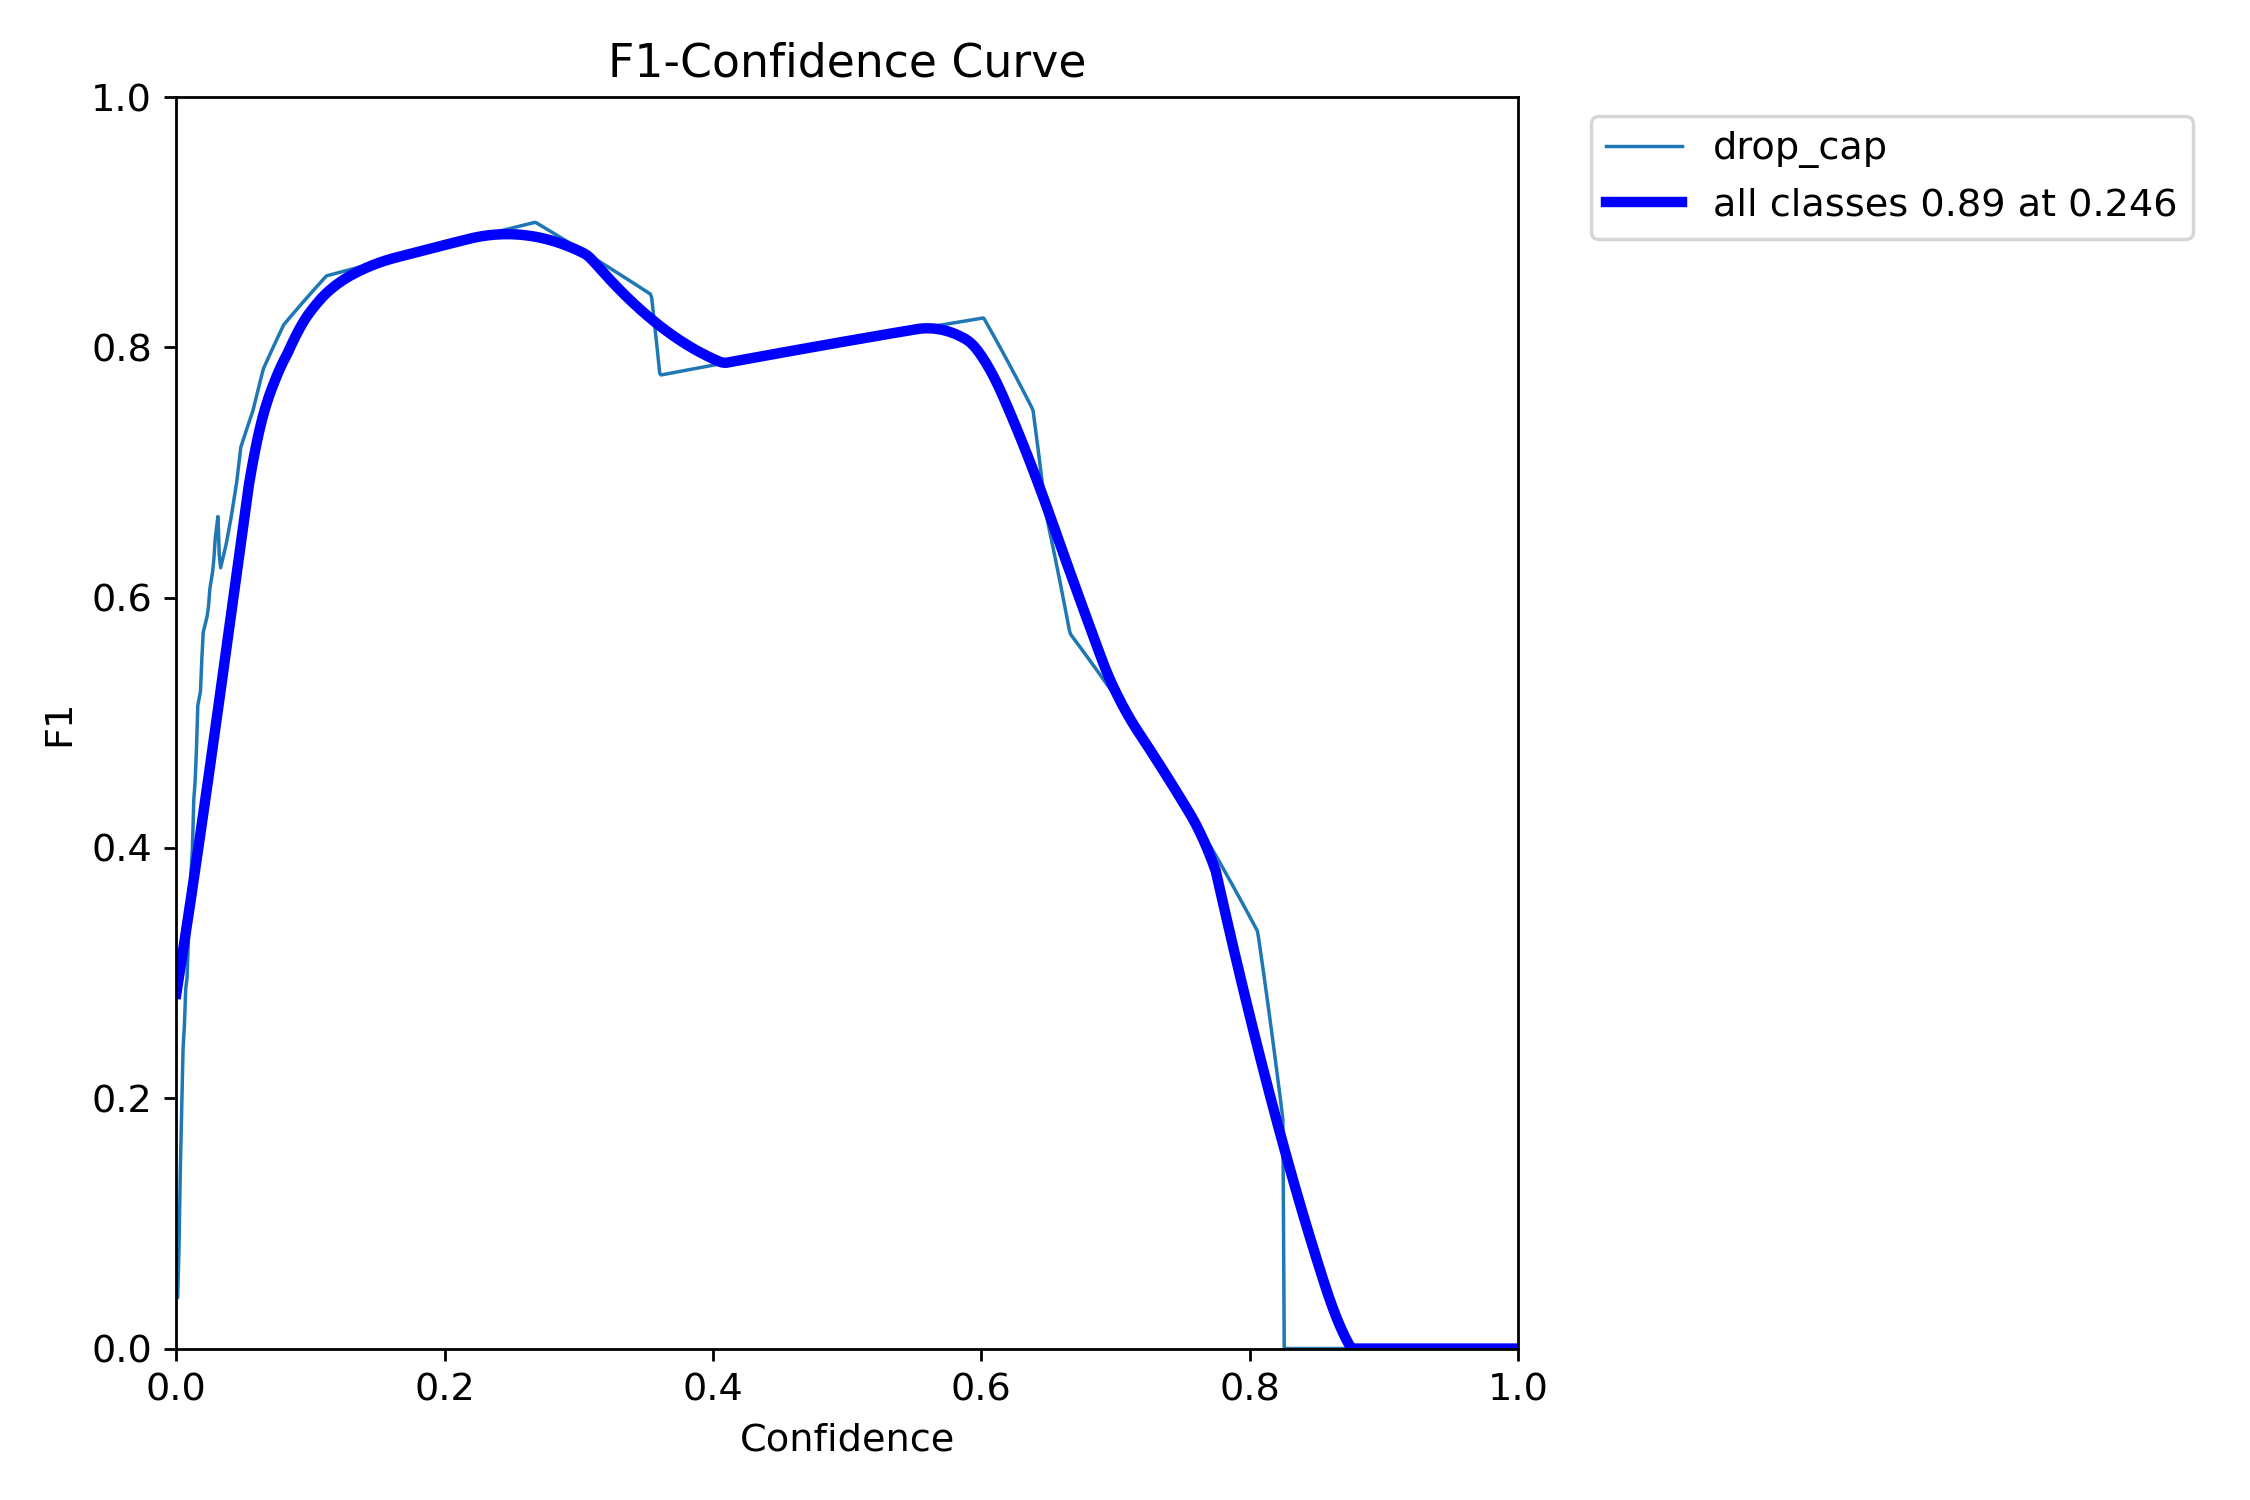

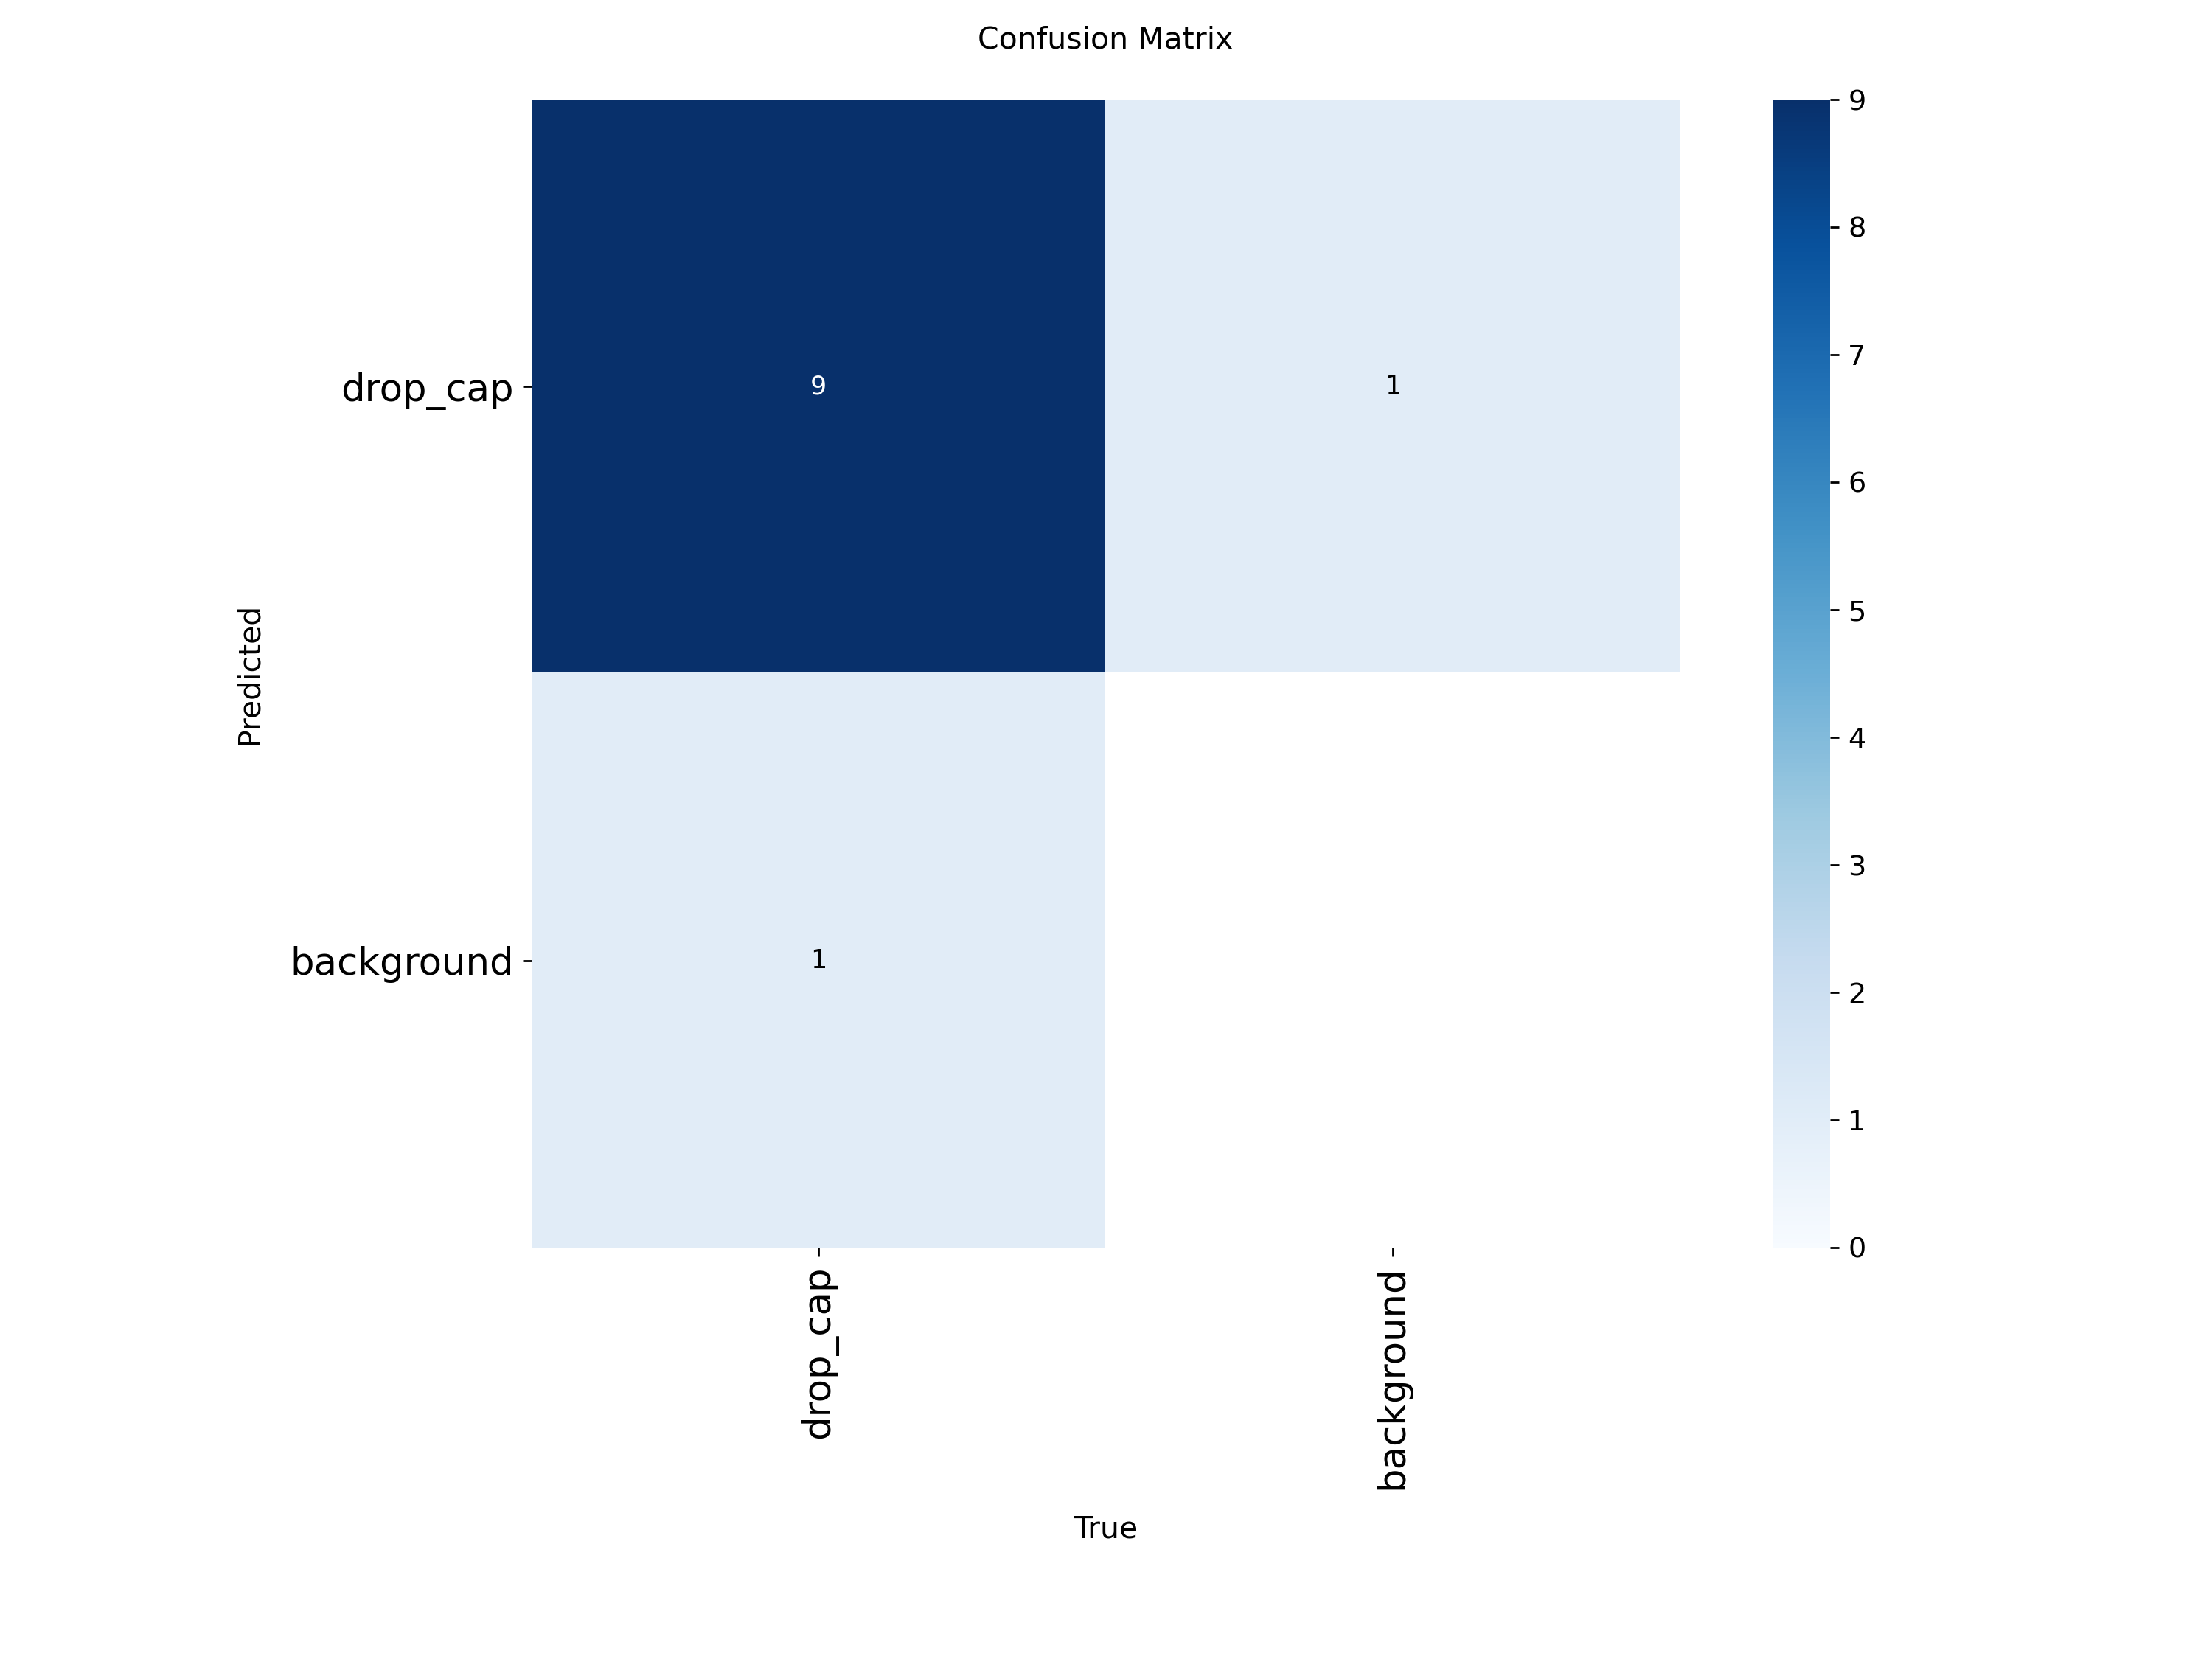

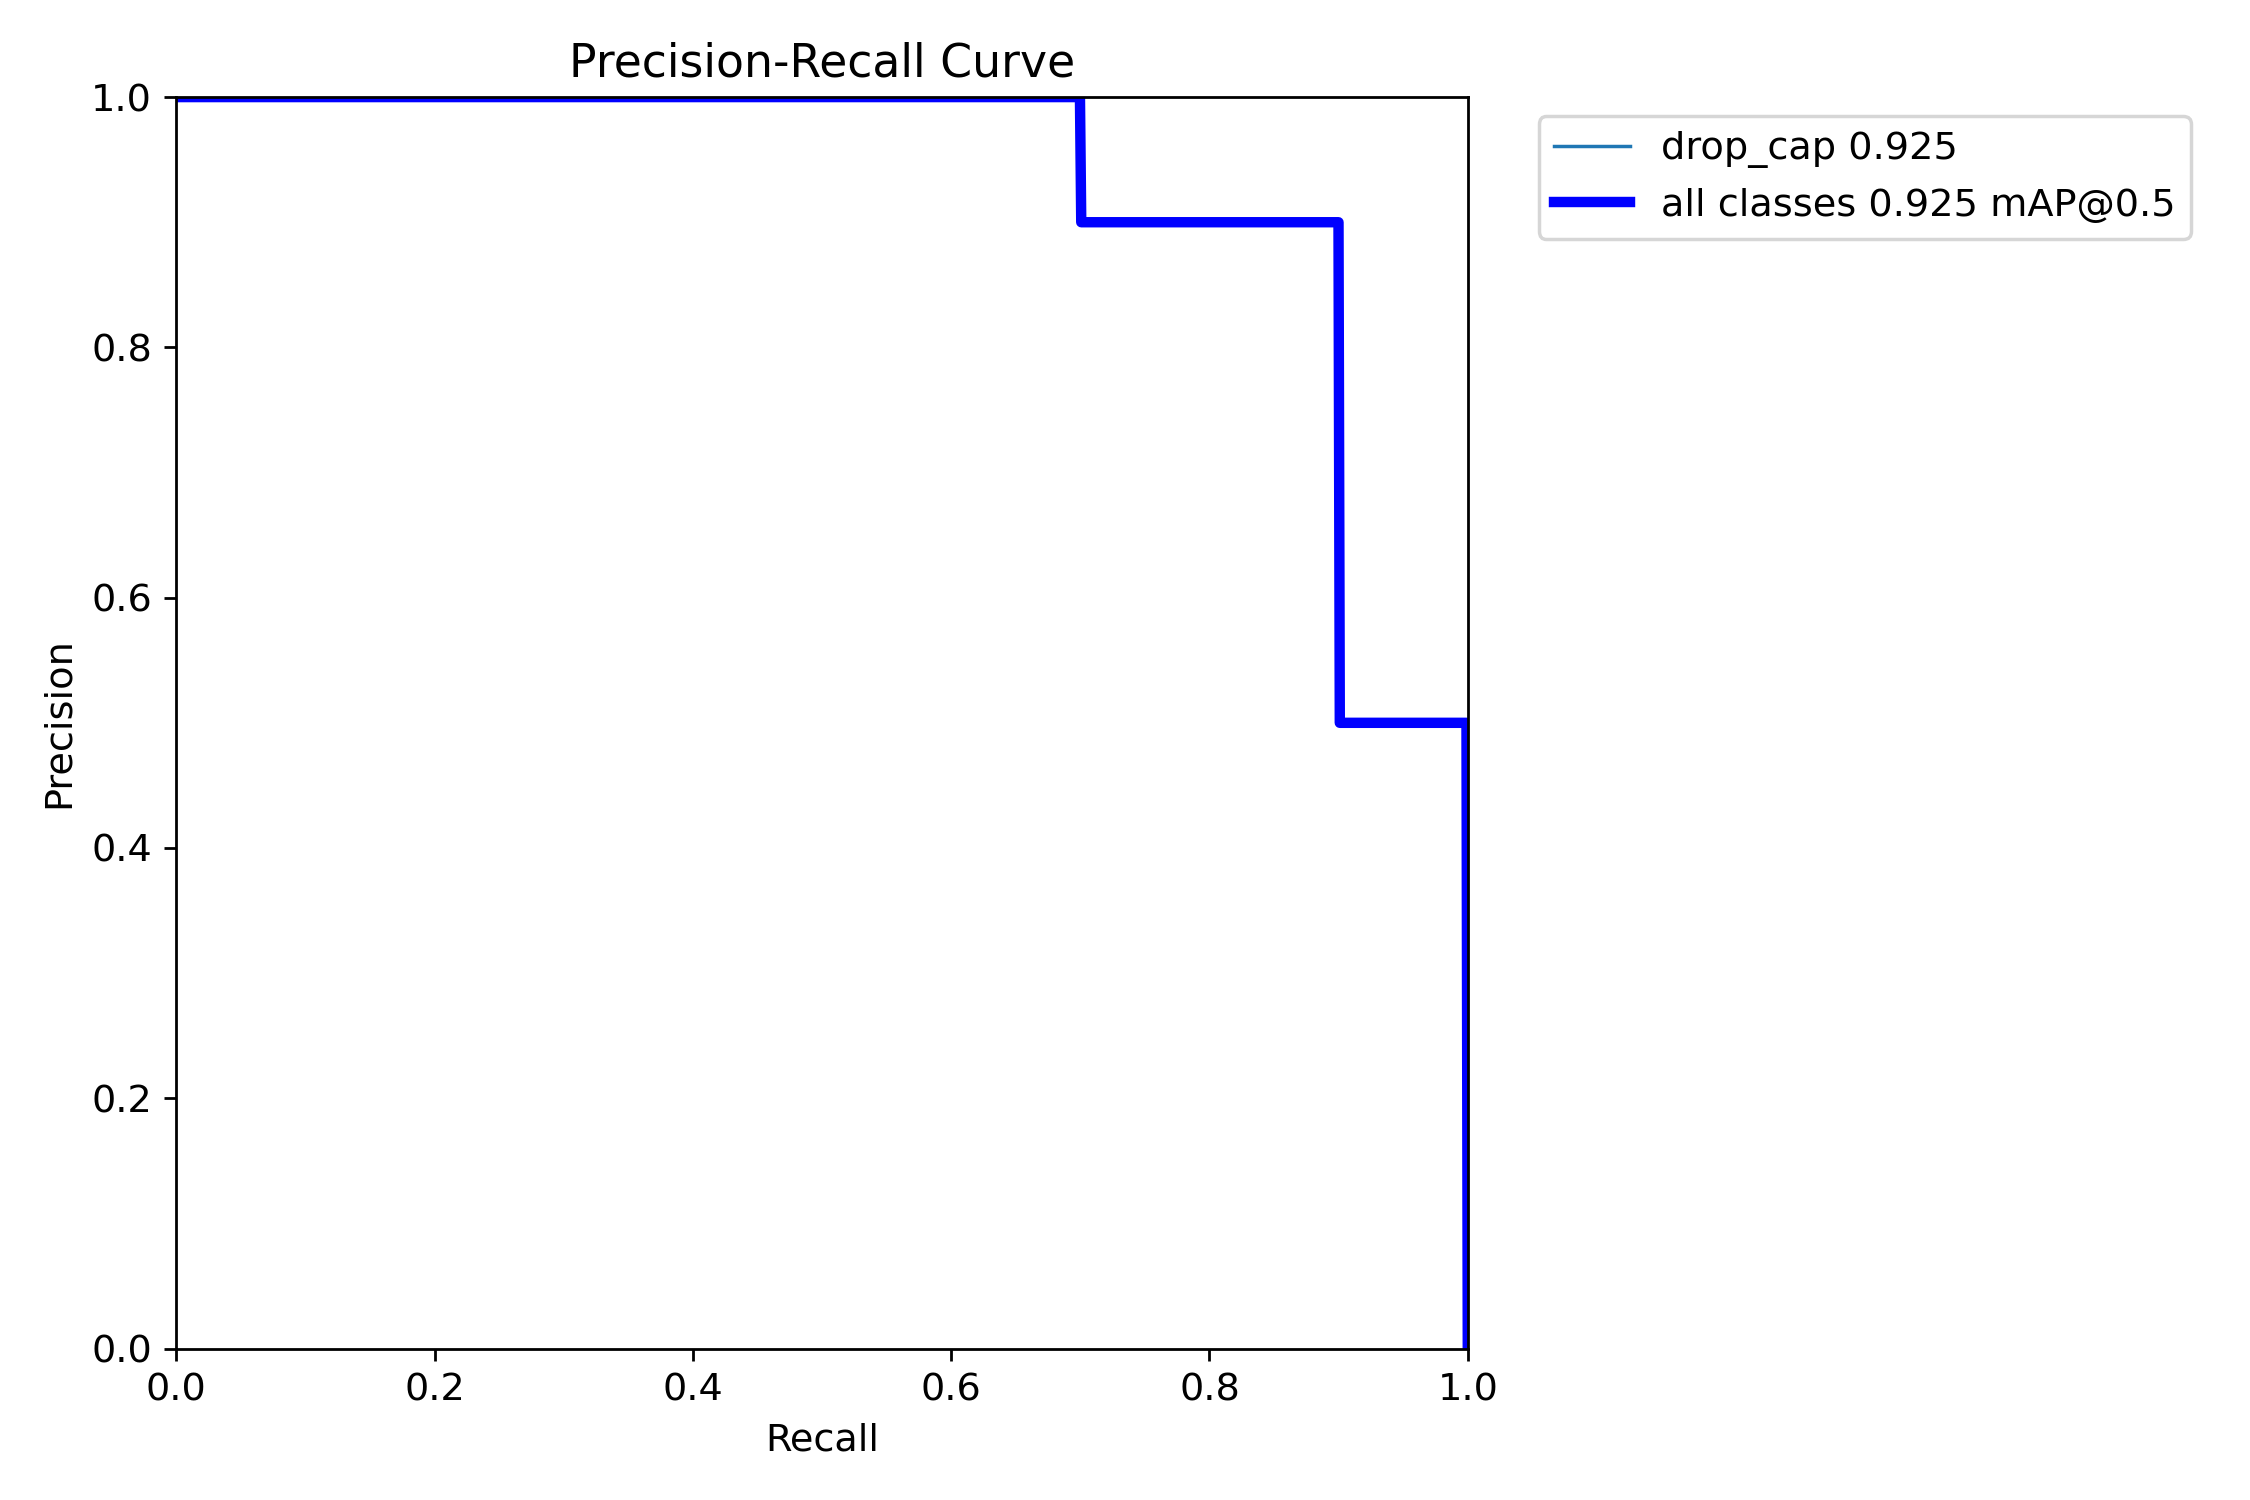

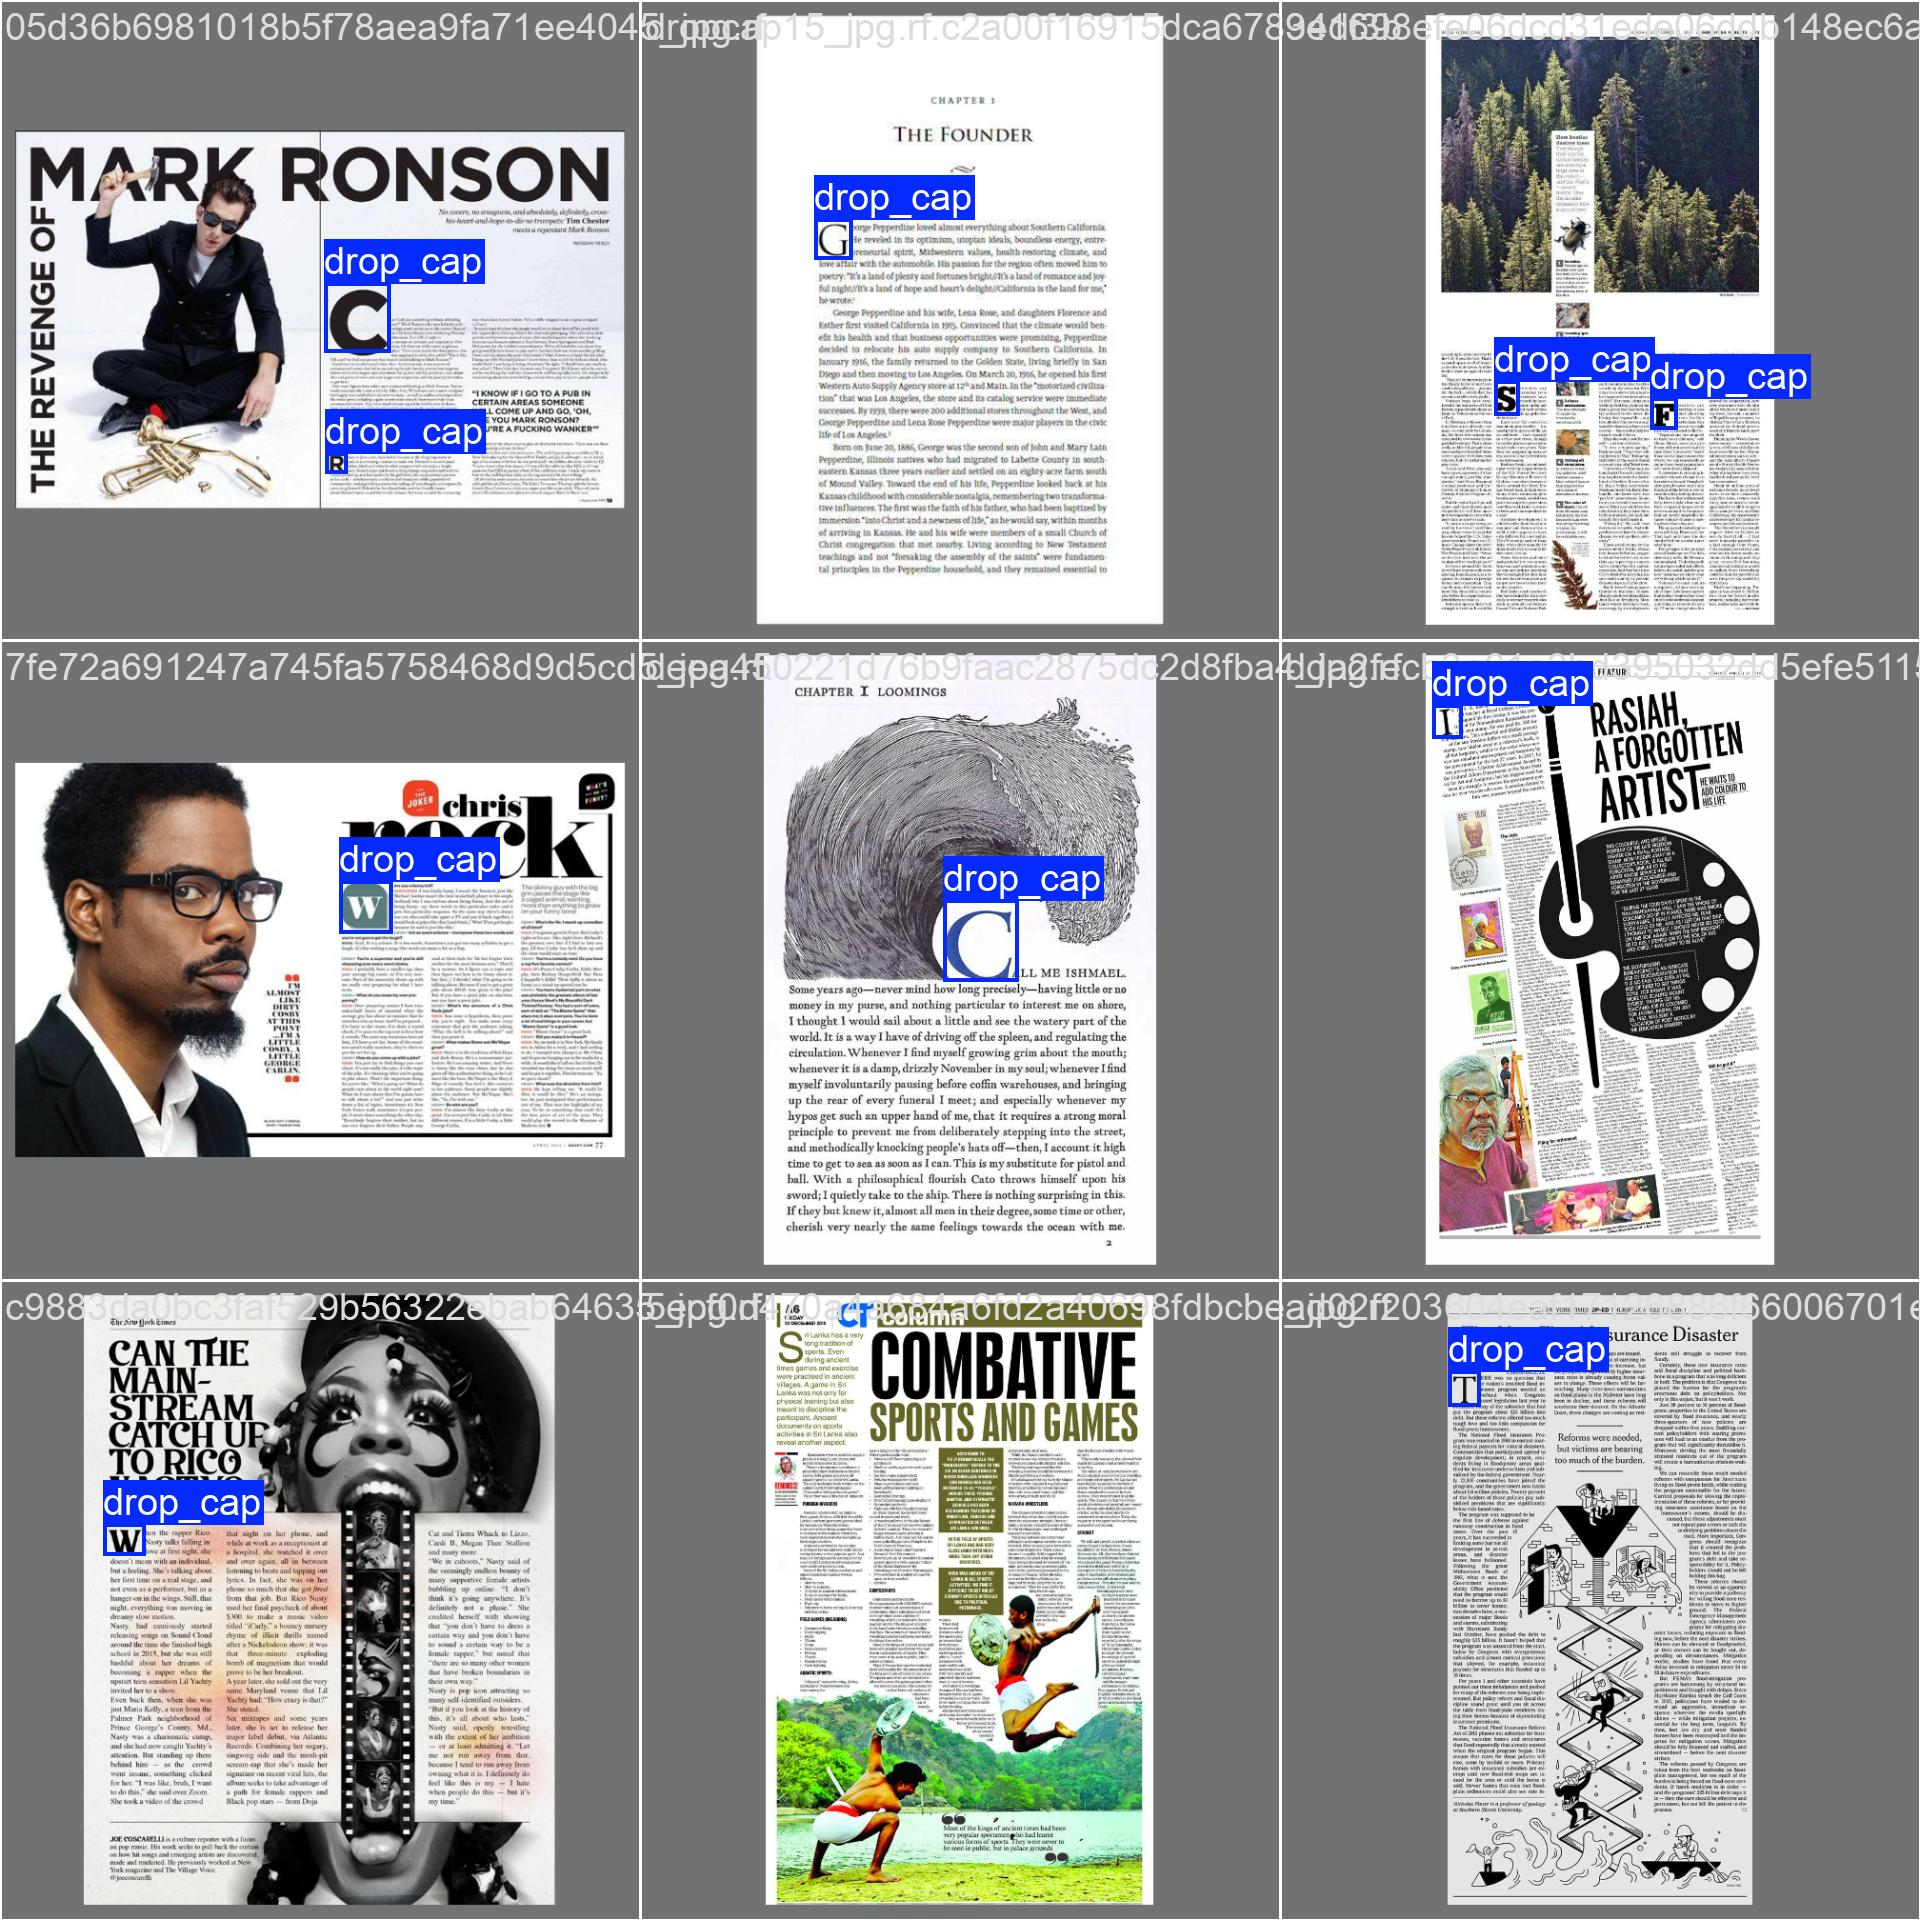

In [21]:
from IPython.display import Image, display

display(Image(filename='runs/detect/val2/F1_curve.png'))
display(Image(filename='runs/detect/val2/confusion_matrix.png'))
display(Image(filename='runs/detect/val2/PR_curve.png'))
display(Image(filename='runs/detect/val2/val_batch0_labels.jpg'))


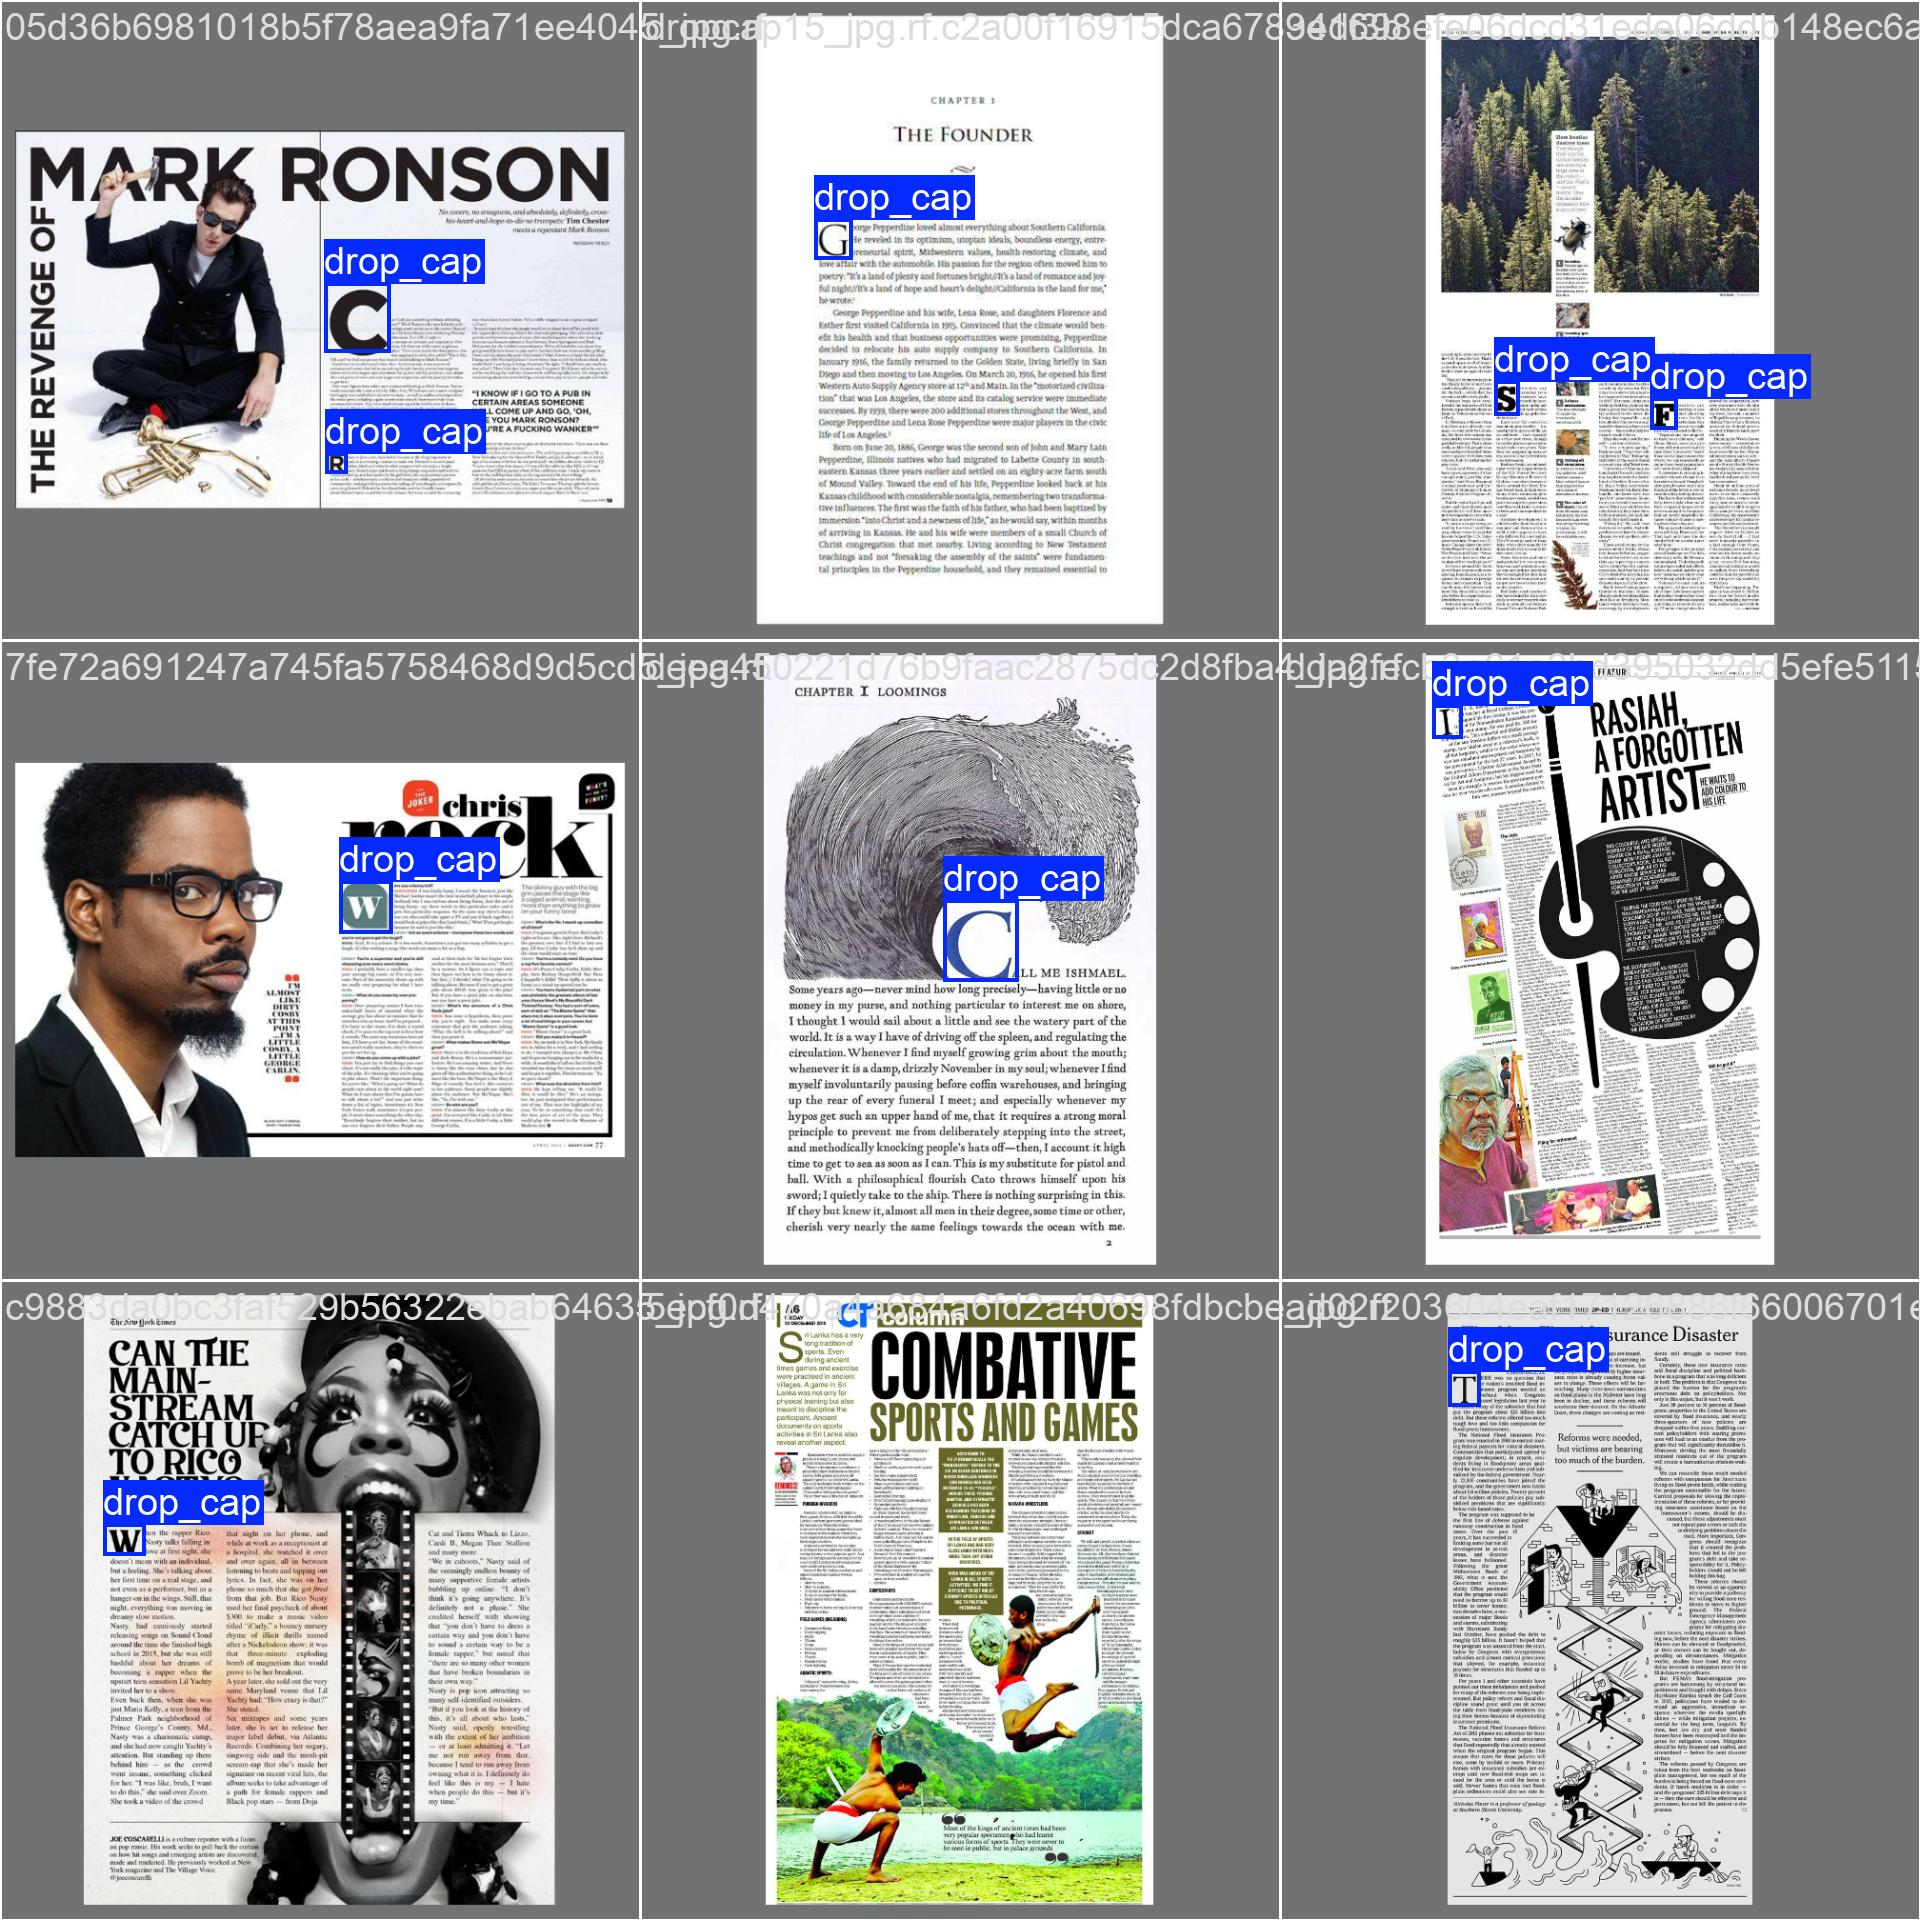

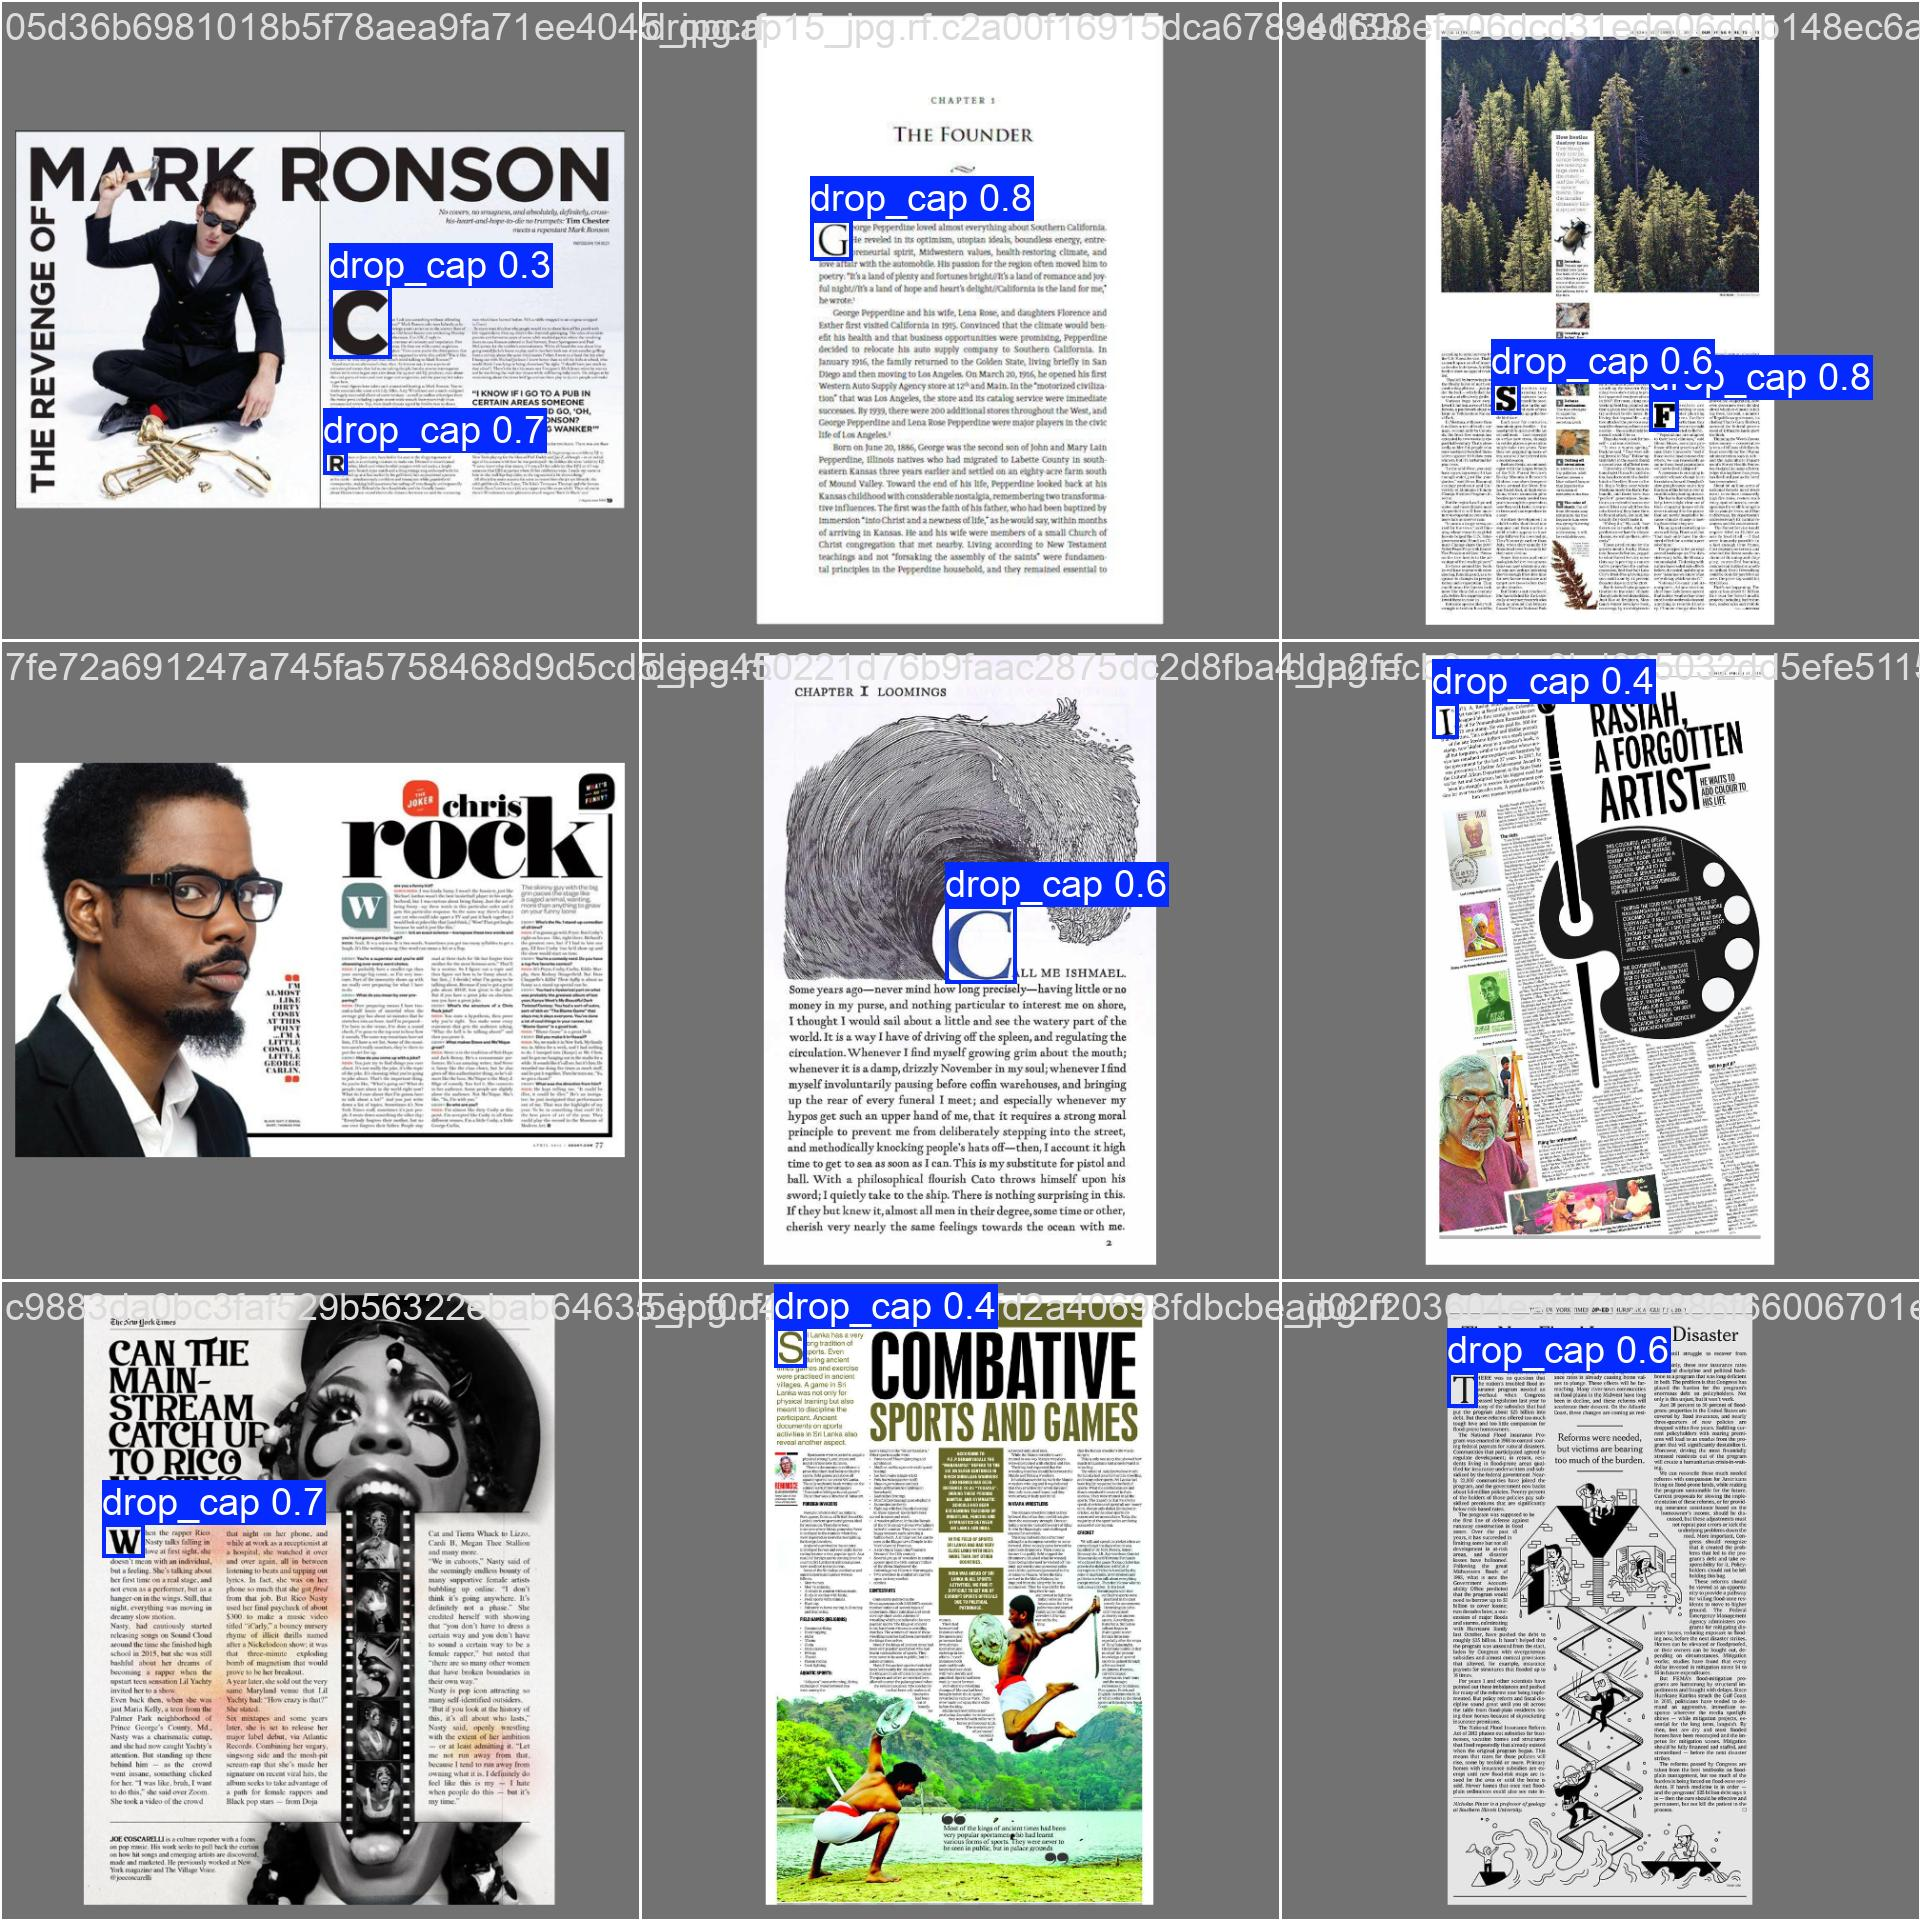

In [22]:
from IPython.display import Image, display
display(Image(filename='runs/detect/val2/val_batch0_labels.jpg'))
display(Image(filename='runs/detect/val2/val_batch0_pred.jpg'))



image 1/1 /content/368bc64e3ac161cffefad1f4b8f34560.jpg: 896x672 1 drop_cap, 67.3ms
Speed: 15.6ms preprocess, 67.3ms inference, 2.4ms postprocess per image at shape (1, 3, 896, 672)


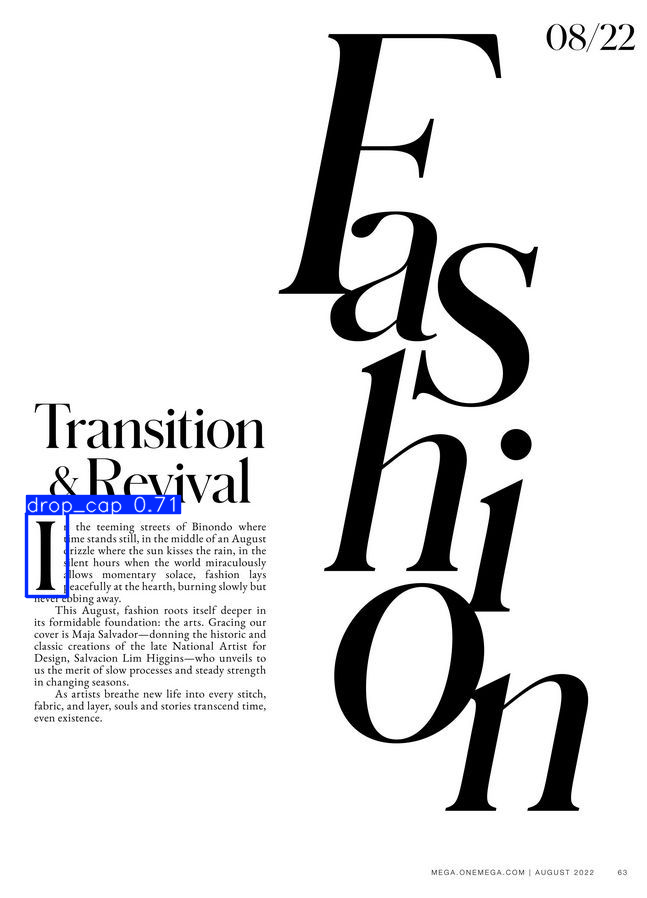

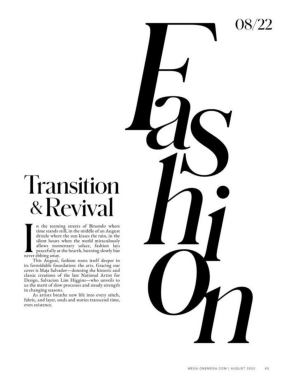

In [23]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2


model = YOLO('/content/dropcap-runs/dropcap-v2/weights/best.pt')

path = '/content/368bc64e3ac161cffefad1f4b8f34560.jpg'


results = model(path)
results[0].show()

img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()


image 1/1 /content/3875d32aca96feaaa01c9f4401827fcf.jpg: 896x704 1 drop_cap, 44.6ms
Speed: 4.5ms preprocess, 44.6ms inference, 1.6ms postprocess per image at shape (1, 3, 896, 704)


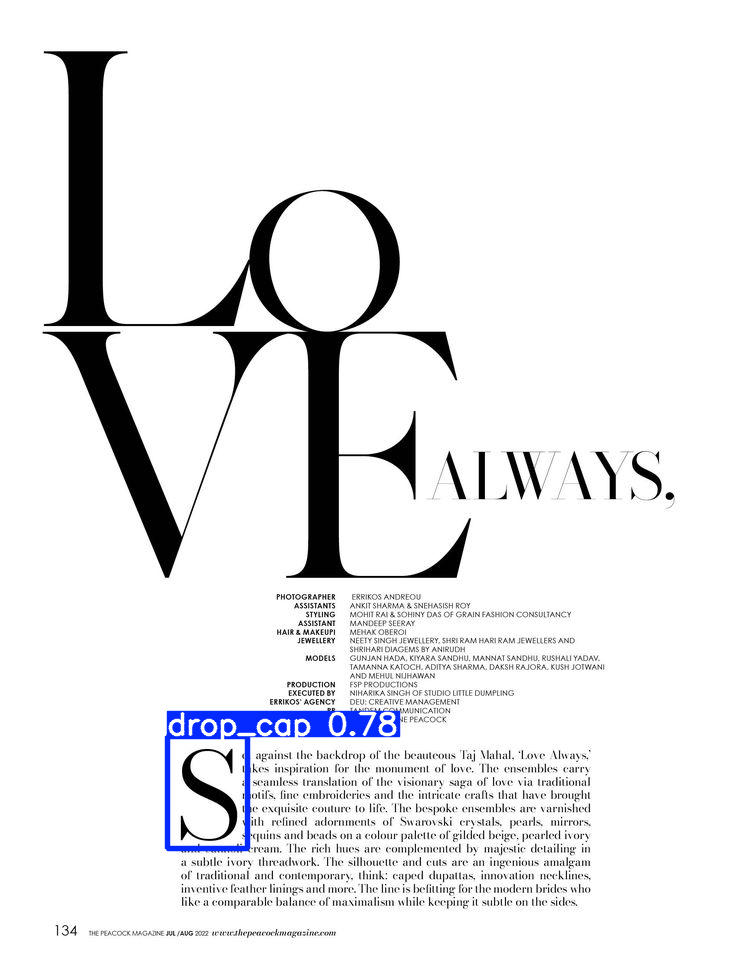

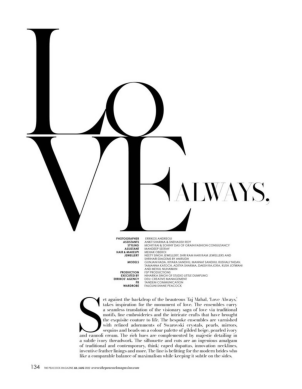

In [24]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2


model = YOLO('dropcap-runs/dropcap-v2/weights/best.pt')

path = '/content/3875d32aca96feaaa01c9f4401827fcf.jpg'


results = model(path)
results[0].show()

img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

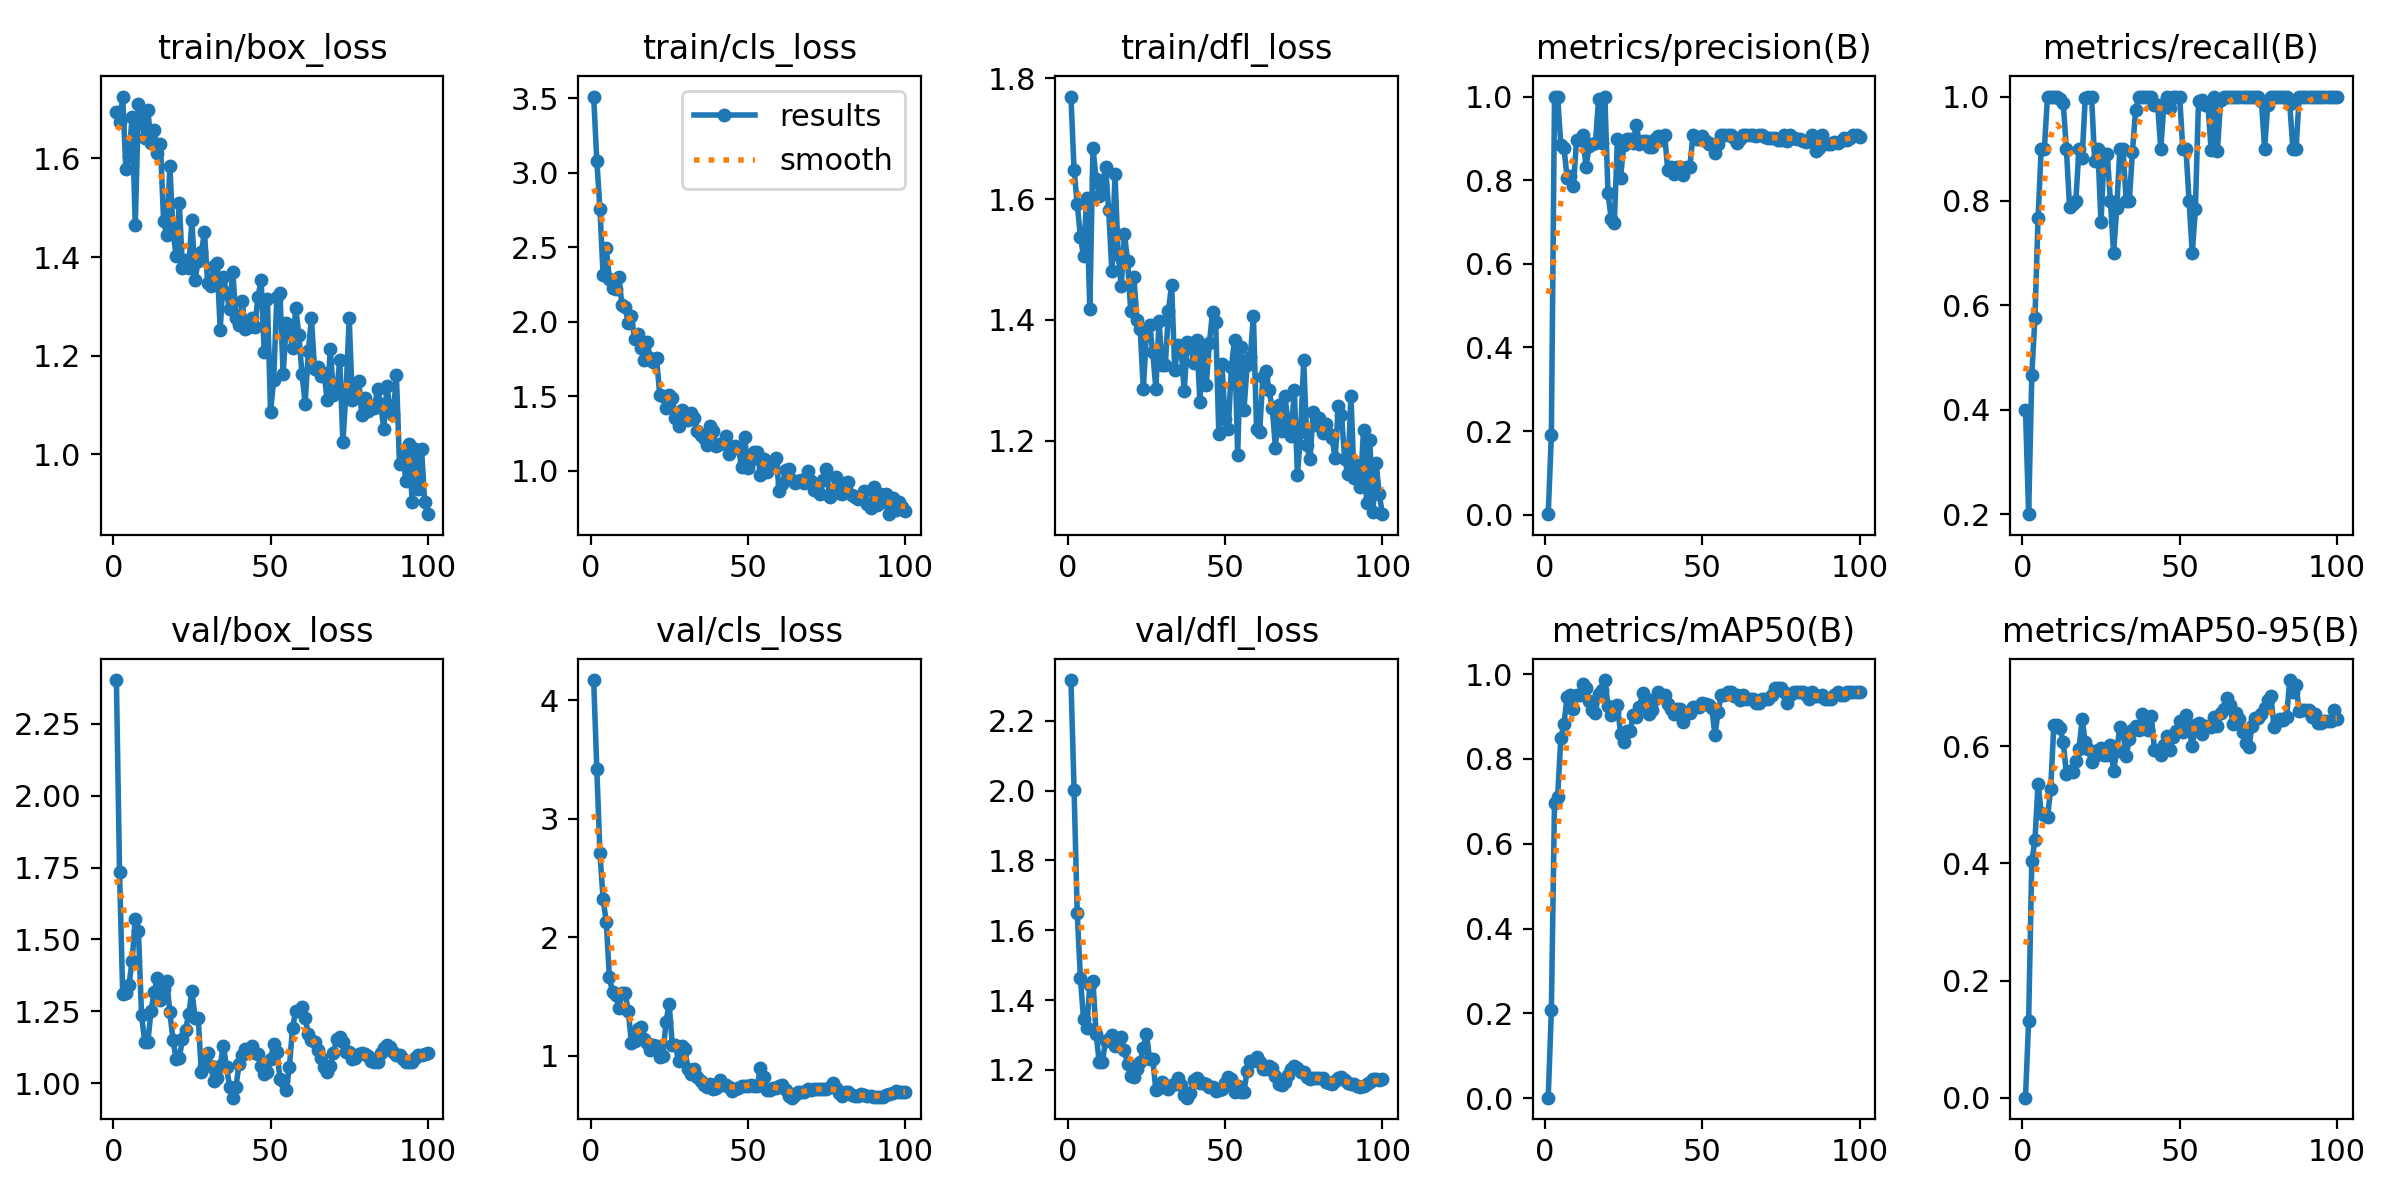

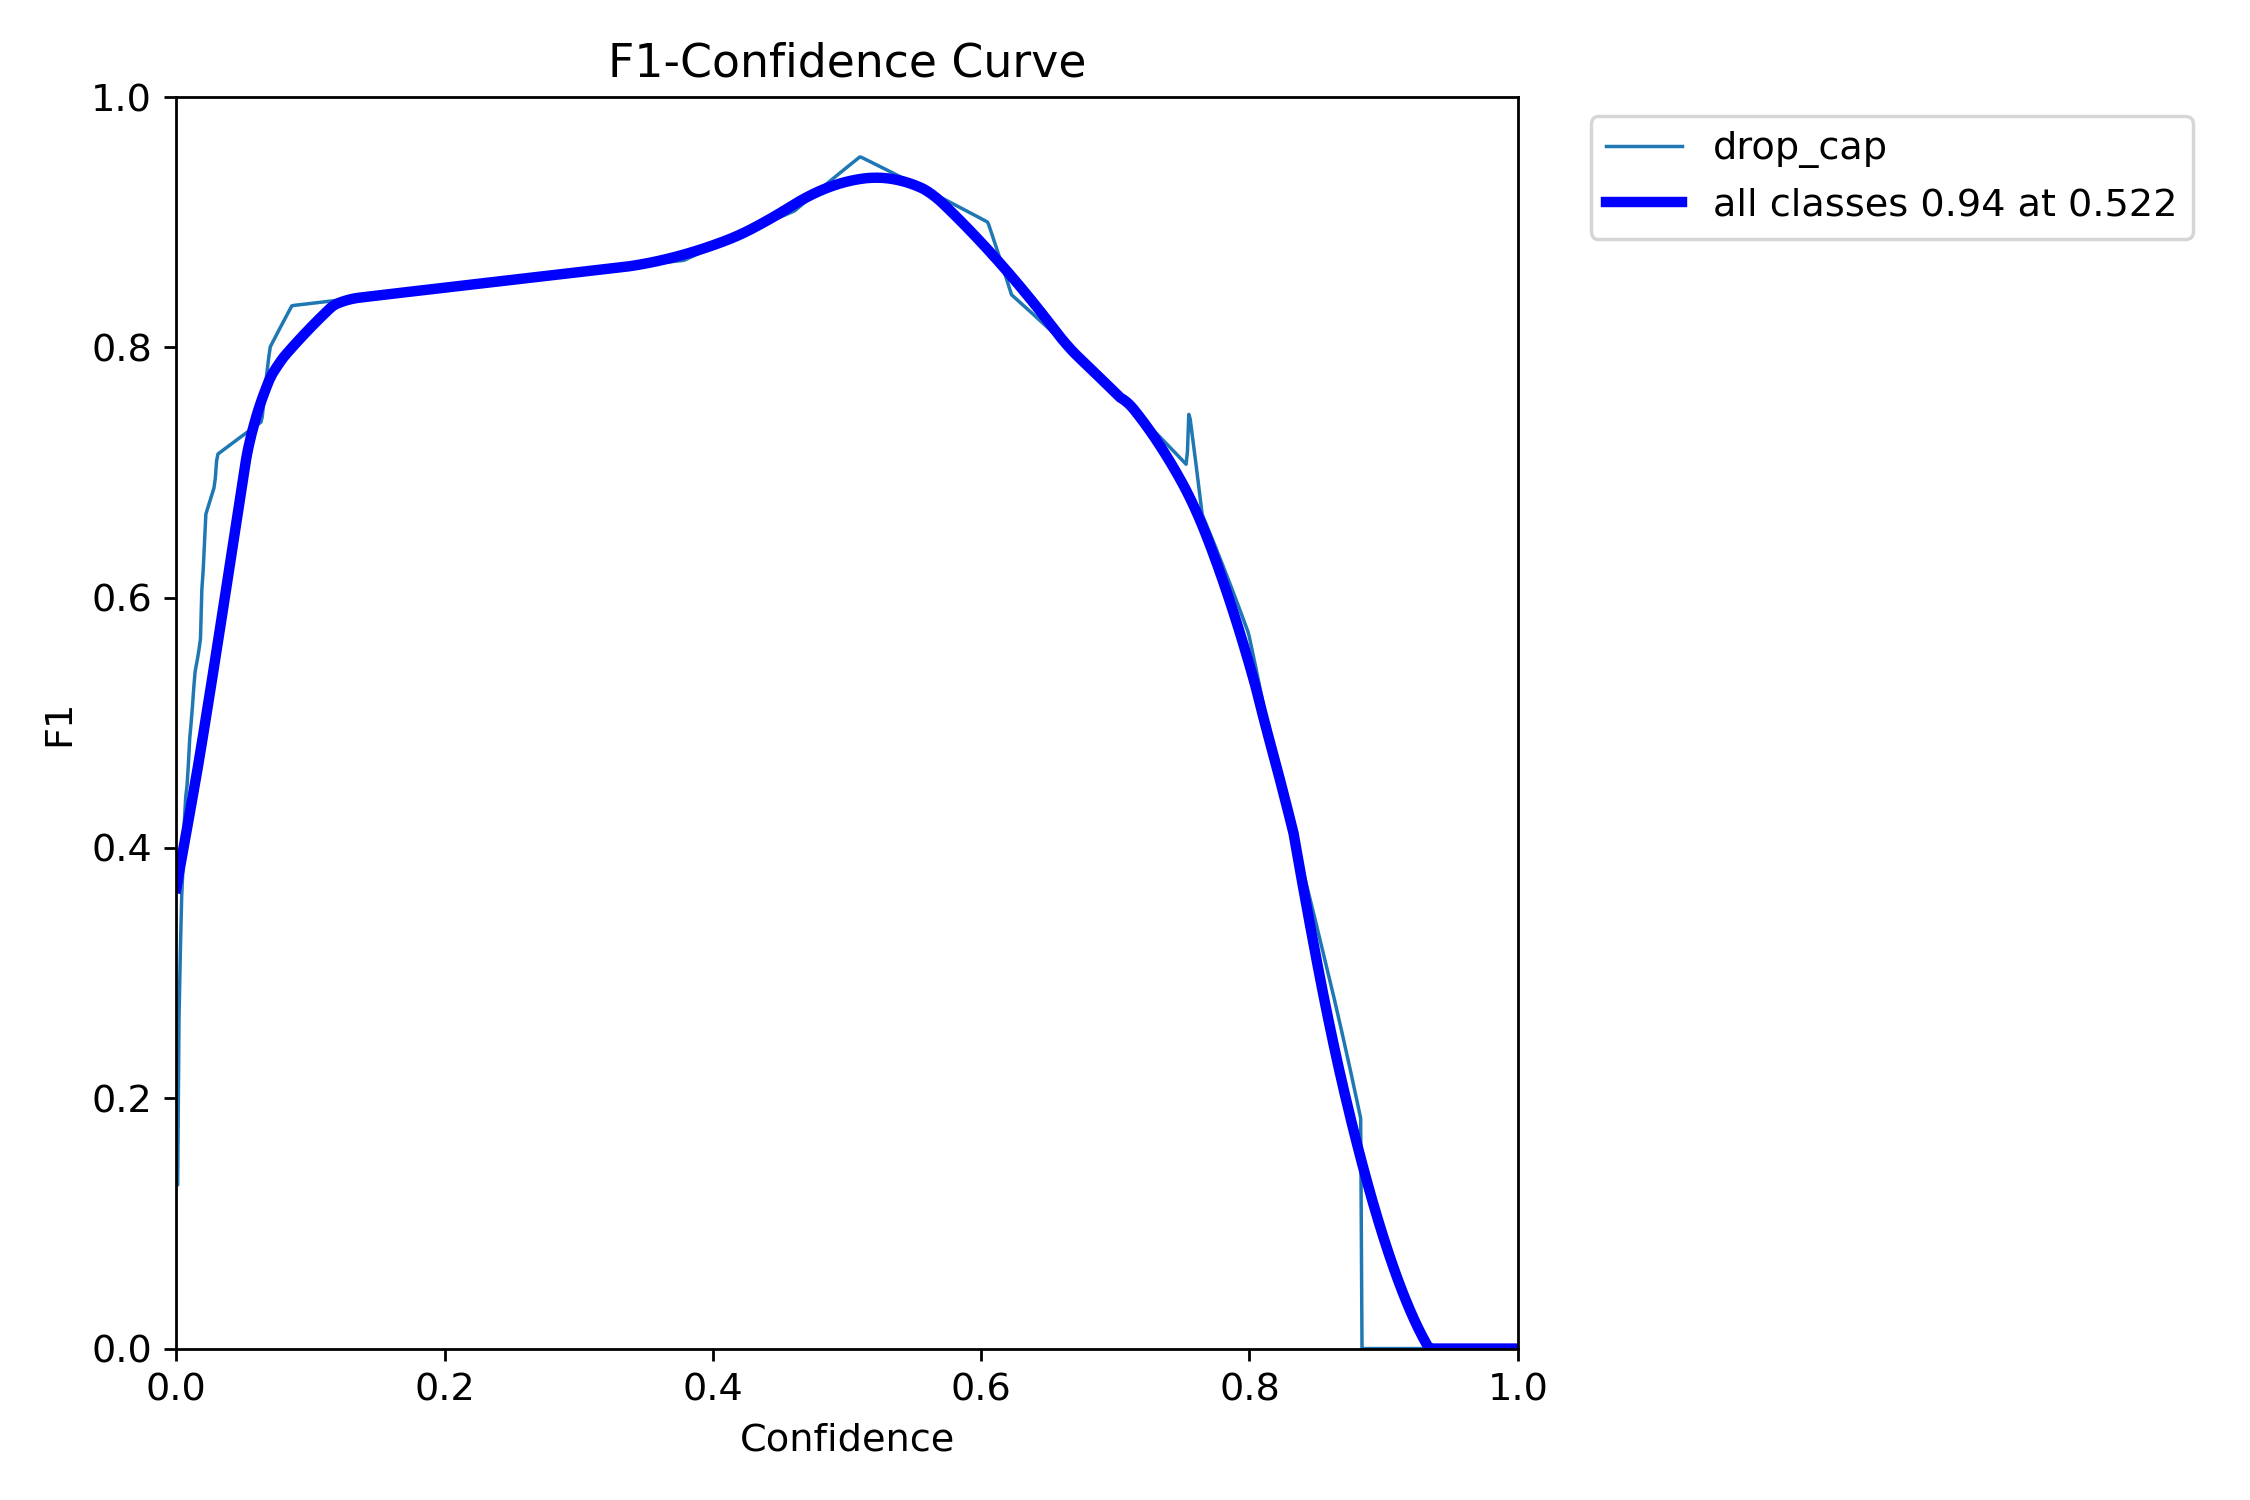

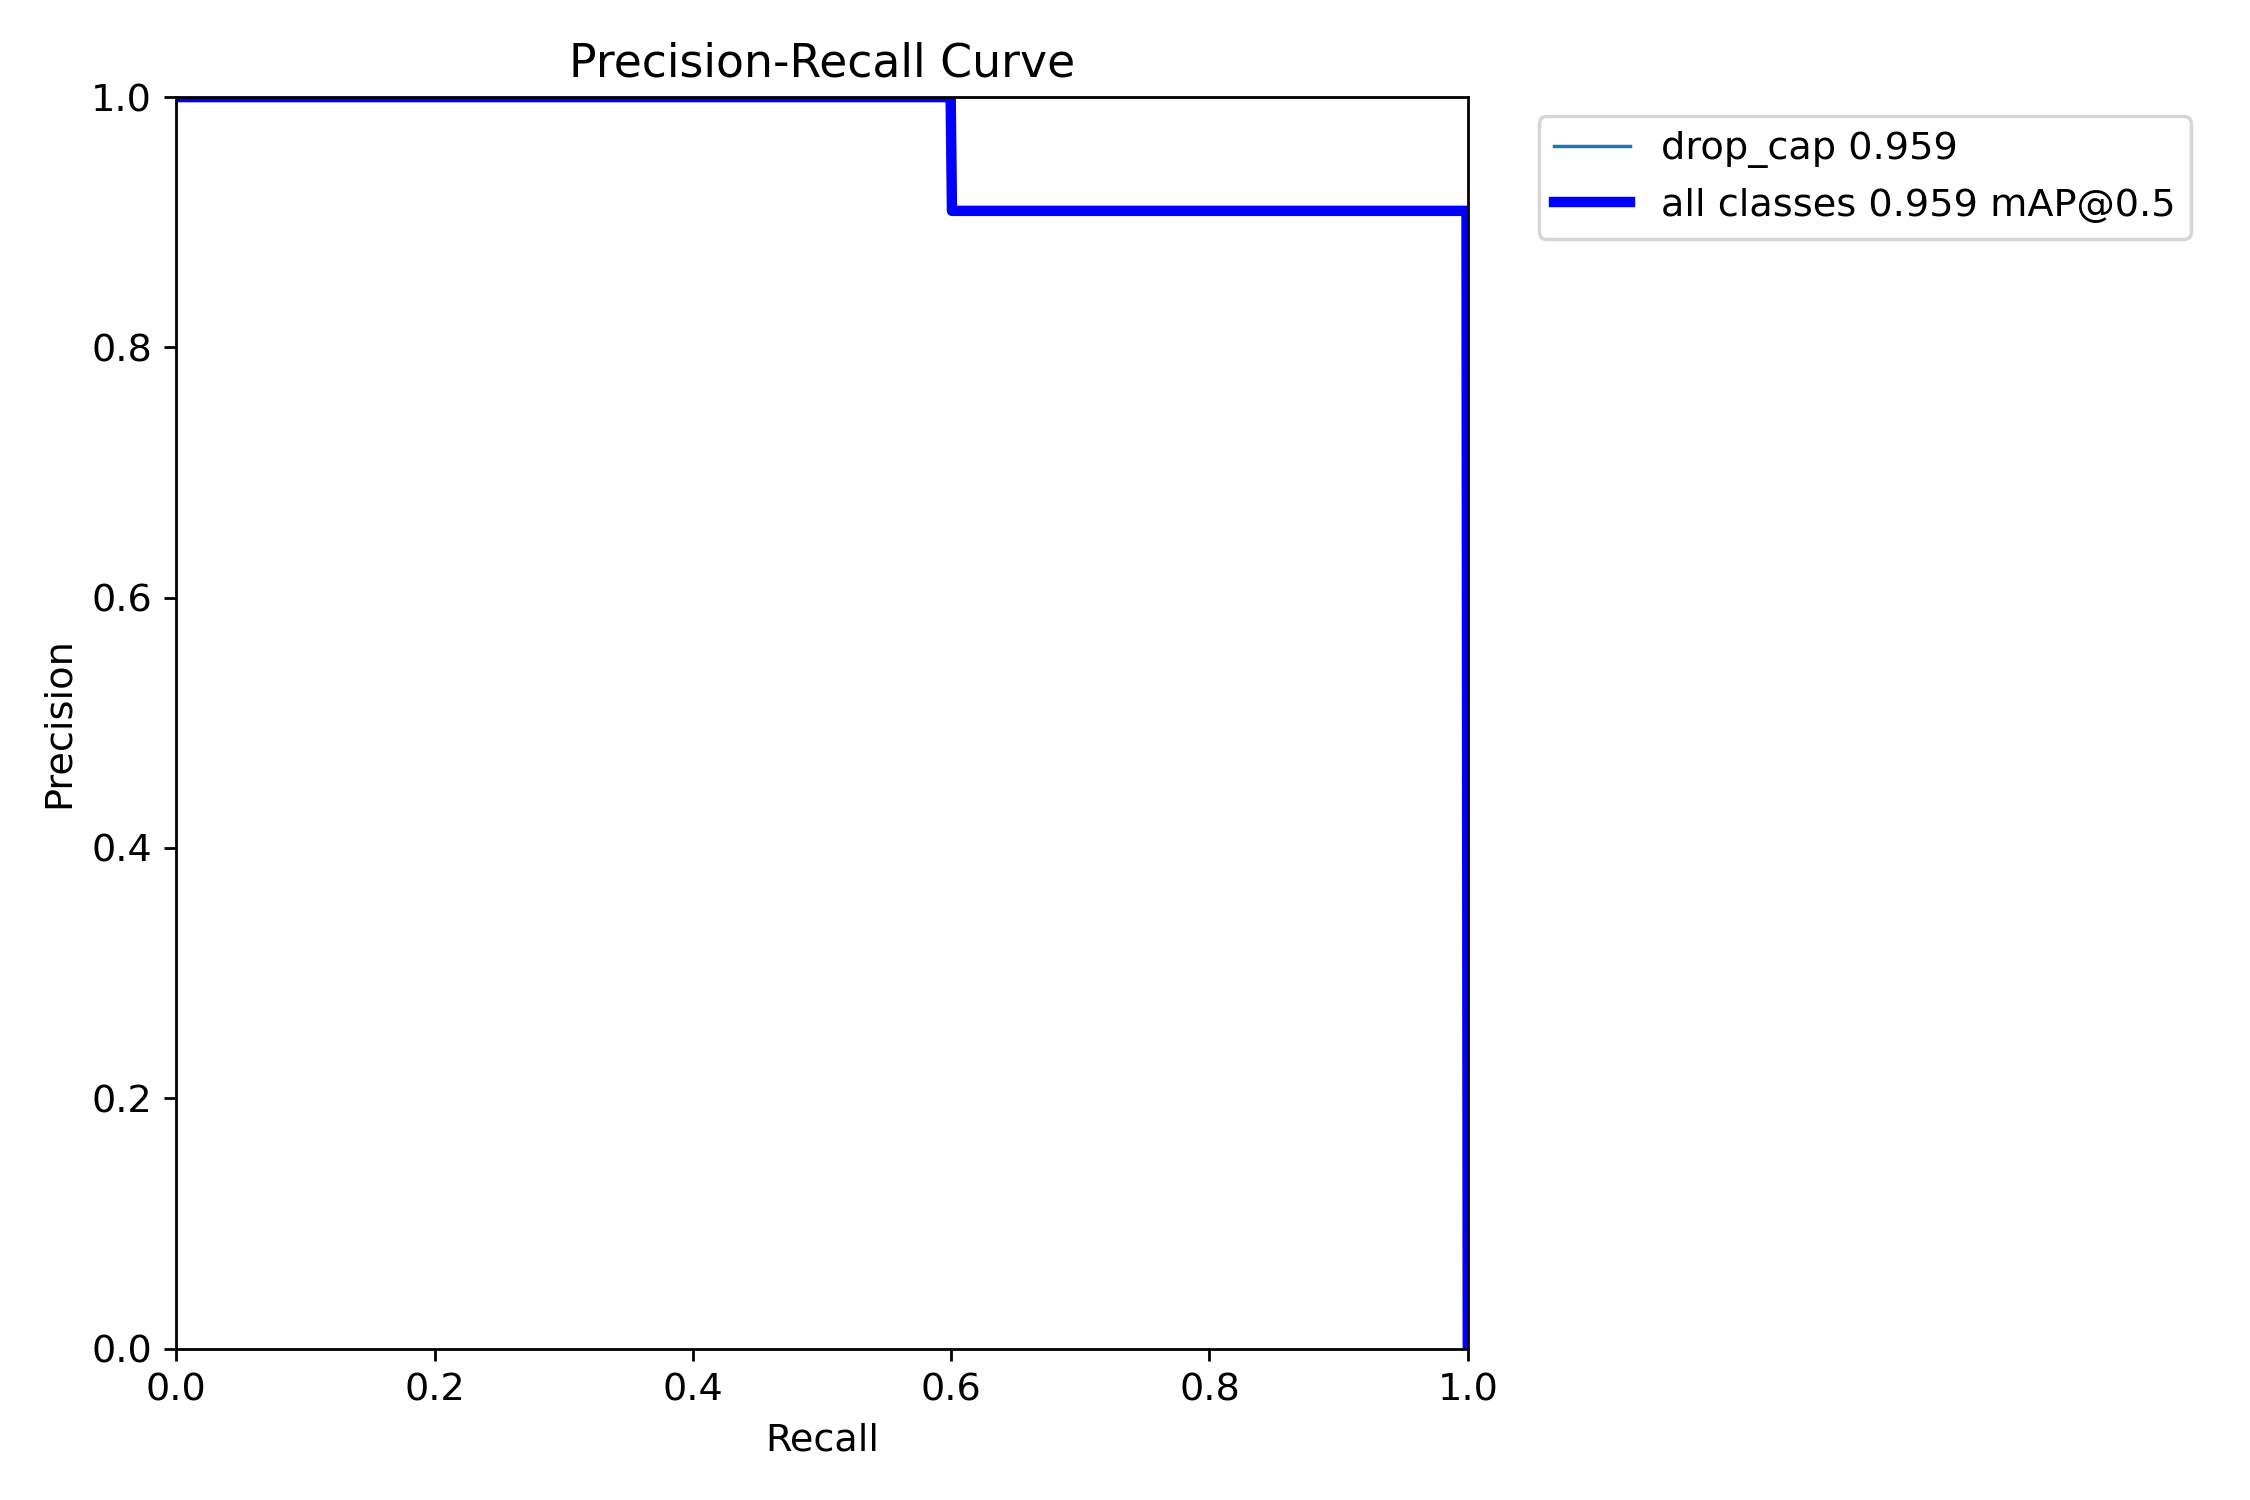

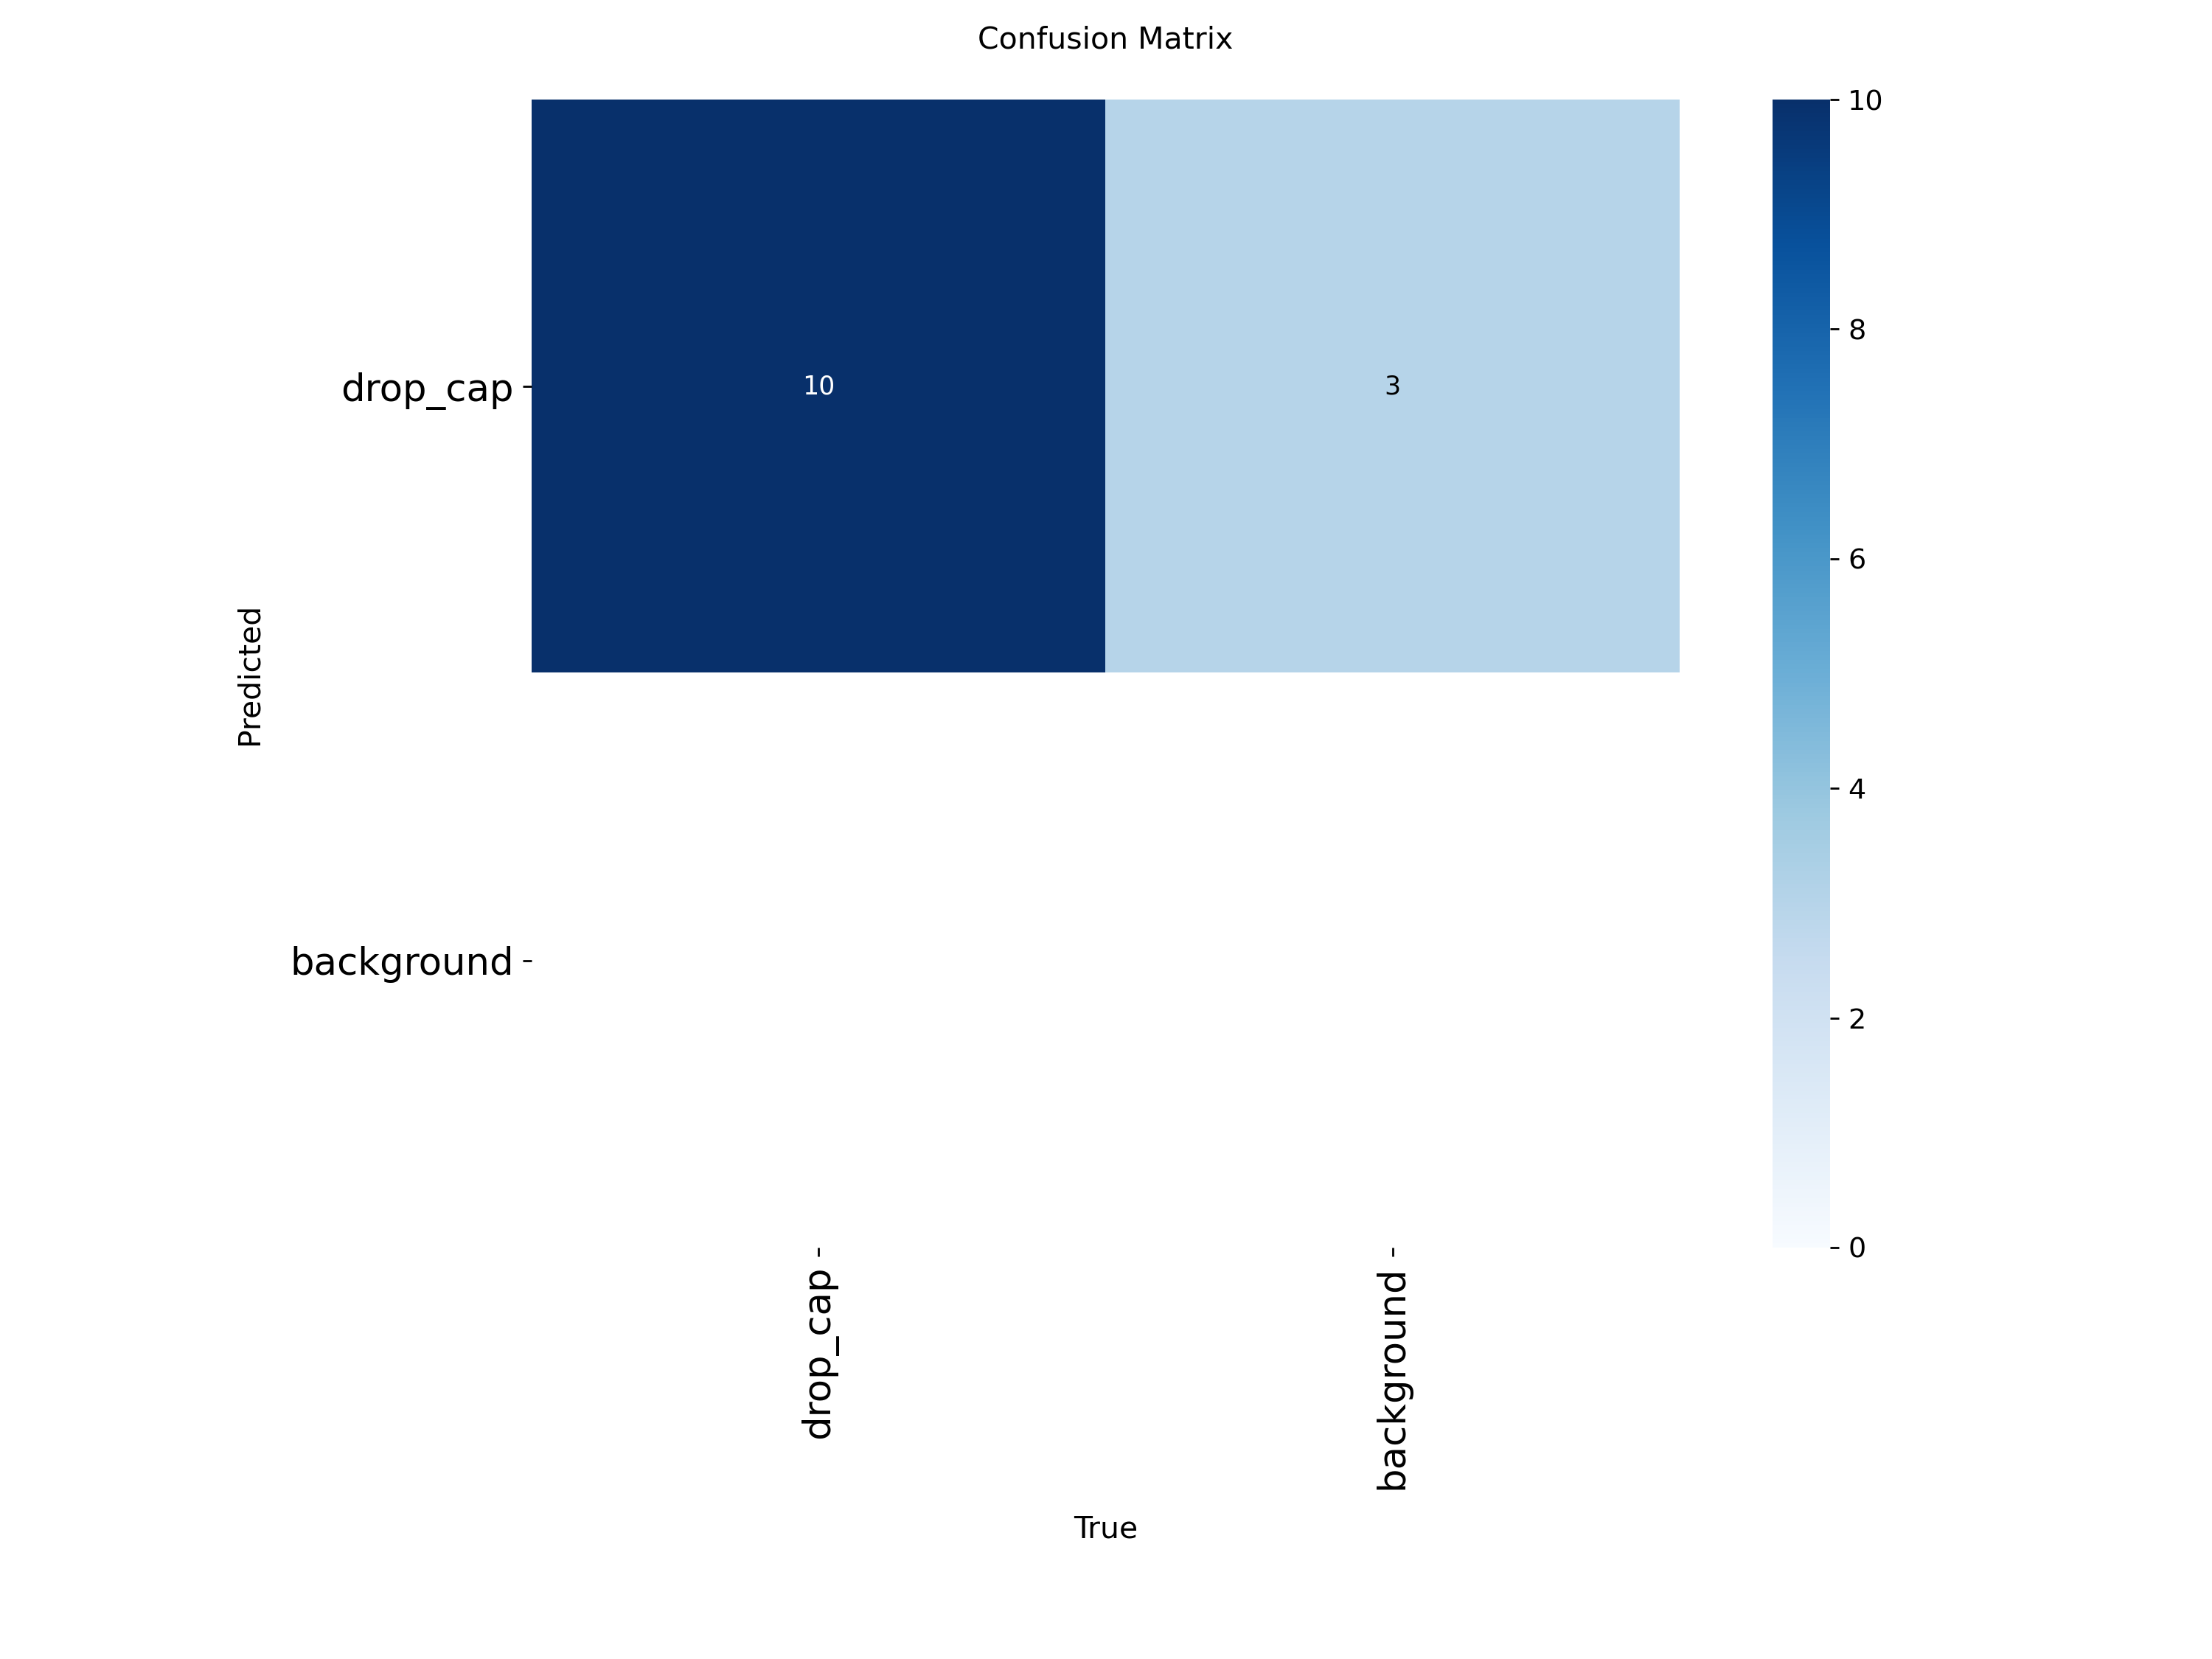

In [25]:
from IPython.display import Image, display

display(Image(filename='/content/dropcap-runs/dropcap-v2/results.png'))
display(Image(filename='/content/dropcap-runs/dropcap-v2/F1_curve.png'))
display(Image(filename='/content/dropcap-runs/dropcap-v2/PR_curve.png'))
display(Image(filename='/content/dropcap-runs/dropcap-v2/confusion_matrix.png'))


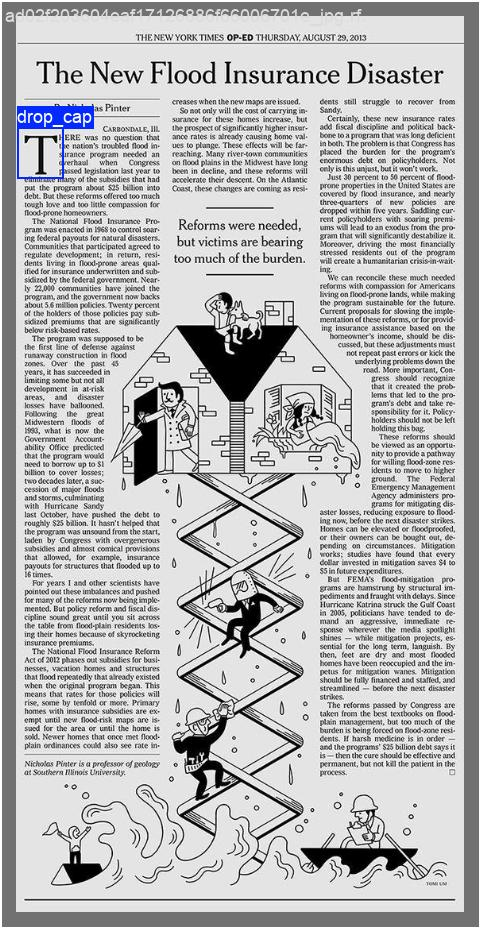

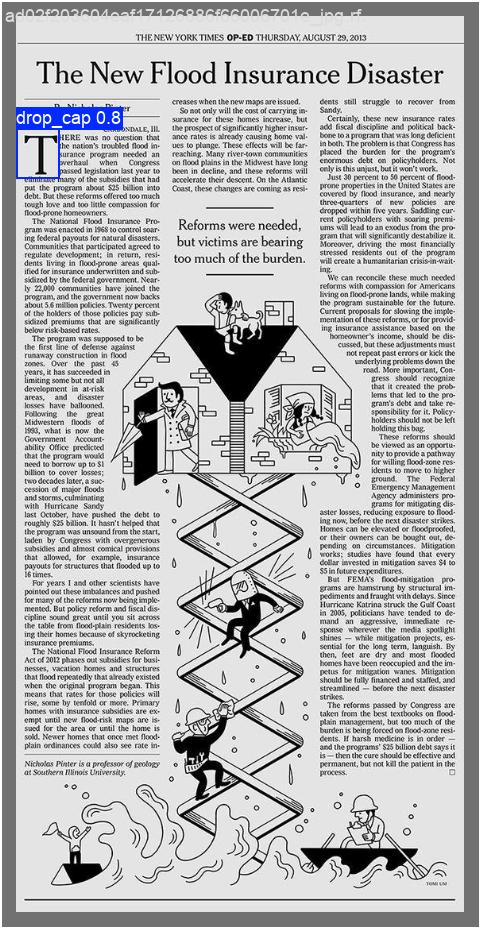

In [28]:
from IPython.display import Image, display

display(Image(filename='/content/dropcap-runs/dropcap-v2/val_batch1_labels.jpg'))
display(Image(filename='/content/dropcap-runs/dropcap-v2/val_batch1_pred.jpg'))
